<a href="https://colab.research.google.com/github/Seboldju/JS_JR_NK_Softwareentwicklung-Tankstellen/blob/main/Download_Daten_und_Erstellung_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set your key variables controlling this script below (Excluded "40d40430-2b76-4fea-9290-ec04583696f8")

In [3]:
id = "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7" # ID of the fuel station of interest (Aral Tankstelle Lochäckerstraße 294)
ids_pf = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "51d4b5ba-a095-1aa0-e100-80009459e03a", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0", "8cf0e749-5ebc-4e51-a968-0a40c9d6ac9f","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]
days = 30 # Number of days of interest, counting backwards from today,
# above 200 days requires local engine or Colab Pro, runs out of memory in free version

Libraries used for this script

In [4]:
import datetime
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Latest Data in Tankerkoenig Data set is yesterday
(updated ca. 4 am in the morning)

In [5]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
print(yesterday)

2024-06-08


Get data from two days ago

In [6]:

twodaysago = today - datetime.timedelta(days=2)

create a function to get link using a date parameter

In [7]:
def linkFromDate(date) :
  link_prefix = "https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=/prices/"
  link_datepart = "2024/04/2024-04-23"
  link_datepart = date.strftime('%Y/%m/%Y-%m-%d')
  link_postfix = "-prices.csv"
  link = link_prefix + link_datepart + link_postfix
  return link


In [8]:
link = linkFromDate(twodaysago)

Download programmatically using python invoking a system command

In [11]:
def downloadData(url) :
  command = ["wget", "-O","prices.csv",url]
  result = subprocess.run(command, capture_output=True, text=True)
  # Print the output from the command
  # print("Output:")
  # print(result.stdout)
  # Check for errors
  if result.stderr:
    print("Error:")
    print(result.stderr)


Download data several days and merge datasets

In [12]:
data = None
for i in range(days):
  day = today - datetime.timedelta(days=(days-i))
  # print(day)
  link = linkFromDate(day)
  try:
    downloadData(link)
    df = pd.read_csv("prices.csv")
    # df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S+02', , utc=True)
    df.date = pd.to_datetime(df.date, utc=True)
    if(data is None) :
      data = df
    else :
      data = pd.concat([data, df], ignore_index=True)
  except:
    print("Could not download or process " + link)
data.describe()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 24900K .......... .......... .......... .......... .......... 17.8M
 24950K .......... .......... .......... .......... ..........  557K
 25000K .......... .......... .......... .......... .......... 25.8M
 25050K .......... .......... .......... .......... .......... 24.8M
 25100K .......... .......... .......... .......... .......... 7.36M
 25150K .......... .......... .......... .......... .......... 16.9M
 25200K .......... .......... .......... .......... .......... 16.5M
 25250K .......... .......... .......... .......... .......... 17.8M
 25300K .......... .......... .......... .......... .......... 17.0M
 25350K .......... .......... .......... .......... .......... 6.02M
 25400K .......... .......... .......... .......... .......... 17.1M
 25450K .......... .......... .......... .......... .......... 21.0M
 25500K .......... .......... .......... .......... .......... 14.4M
 25550K .......... .......... ......

,diesel,e5,e10,dieselchange,e5change,e10change
count,1.227067e+07,1.227067e+07,1.227067e+07,1.227067e+07,1.227067e+07,1.227067e+07
mean,1.647704e+00,1.823098e+00,1.716382e+00,7.879177e-01,7.731505e-01,7.508989e-01
std,5.571833e-02,2.332840e-01,3.645444e-01,4.179107e-01,4.276453e-01,4.406487e-01
min,-1.000000e-03,-1.000000e-03,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.609000e+00,1.819000e+00,1.749000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.649000e+00,1.849000e+00,1.789000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.679000e+00,1.879000e+00,1.819000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,4.449000e+00,4.449000e+00,4.449000e+00,3.000000e+00,3.000000e+00,3.000000e+00


Plot data for a given fuel stations for a week

In [13]:
# Importing necessary libraries for plot
import matplotlib.pyplot as plt
import seaborn as sns

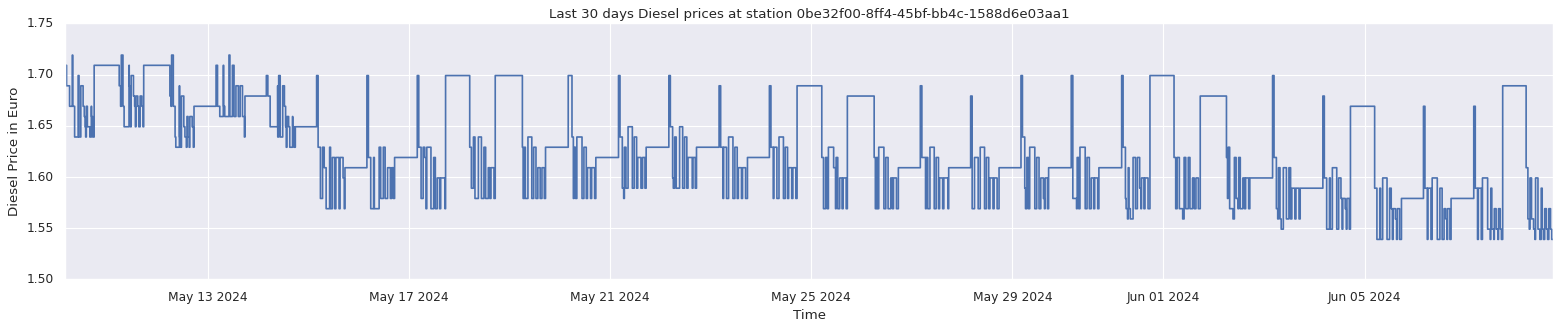

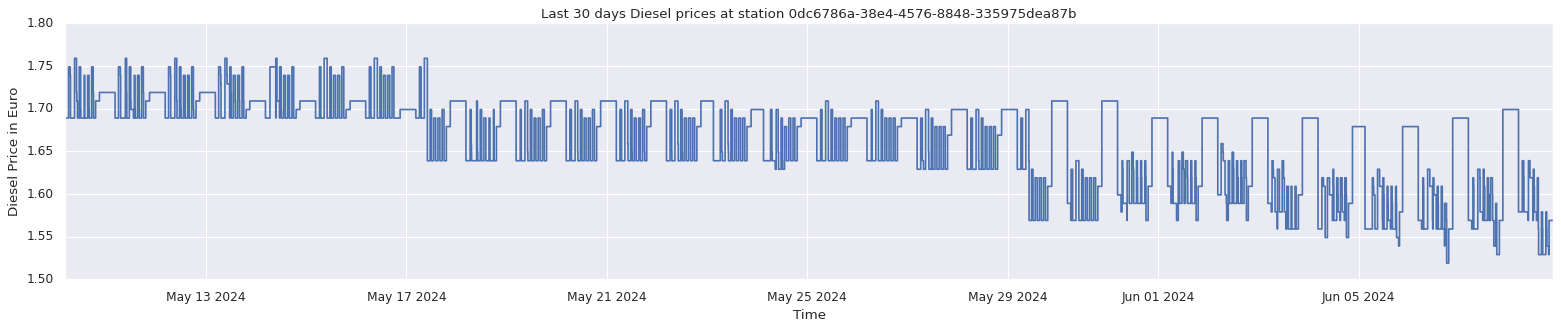

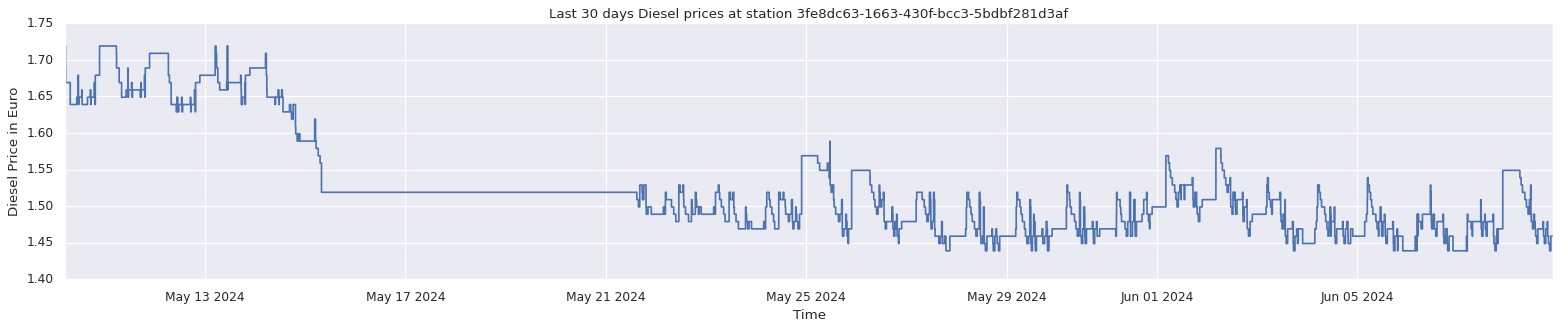

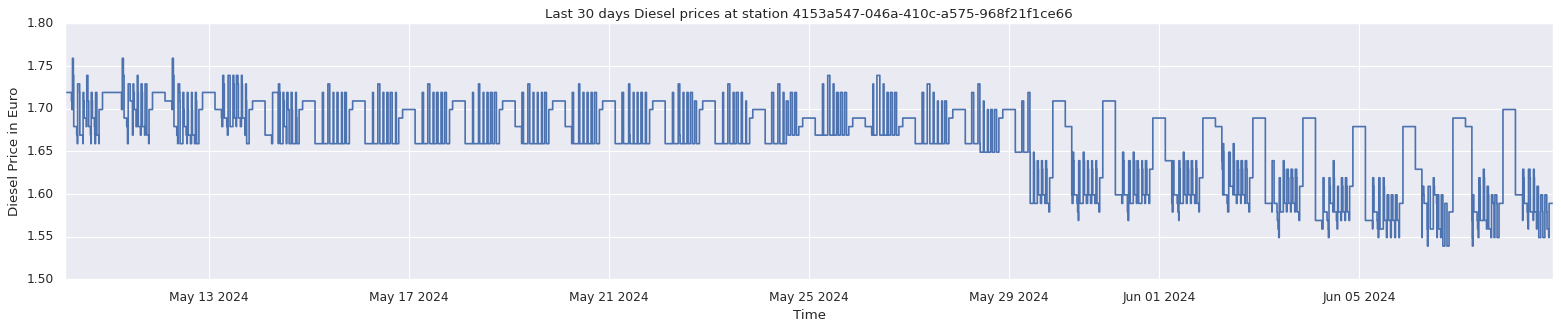

No data for station 51d4b5ba-a095-1aa0-e100-80009459e03a


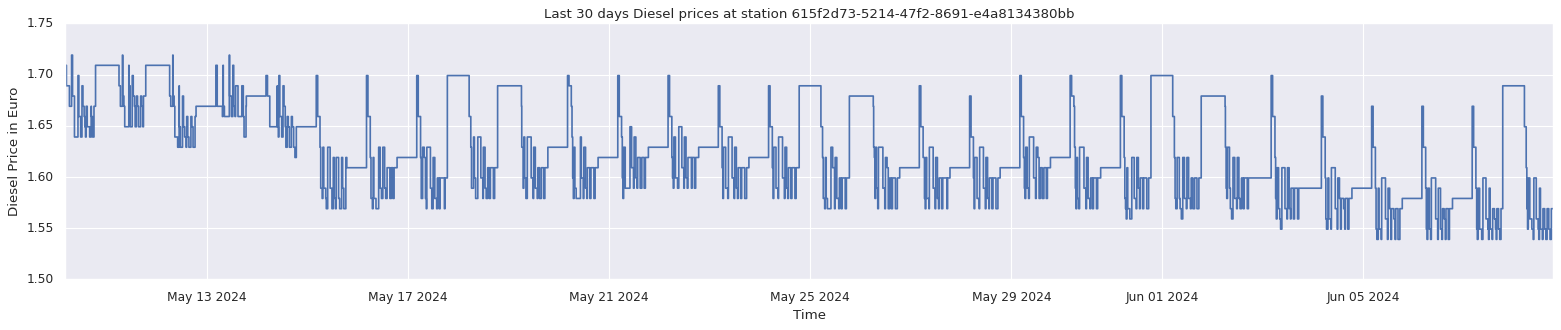

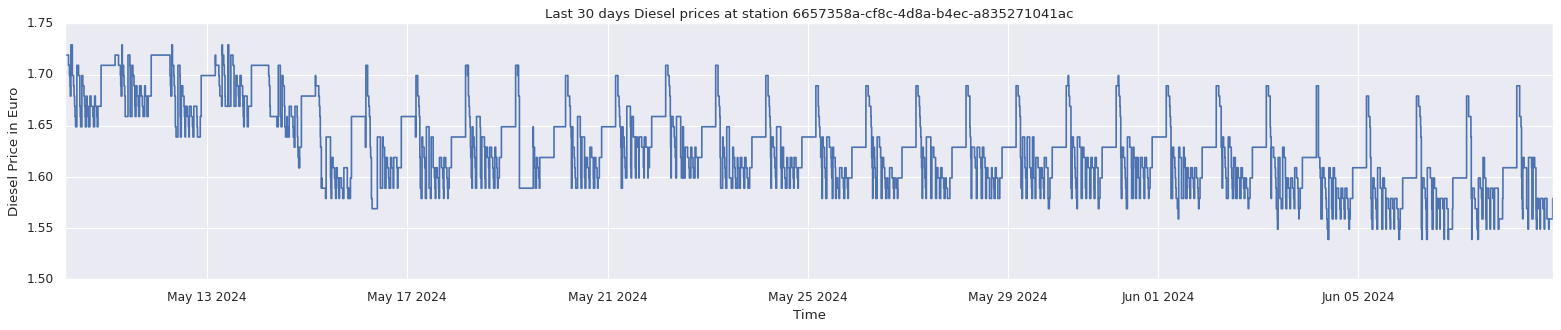

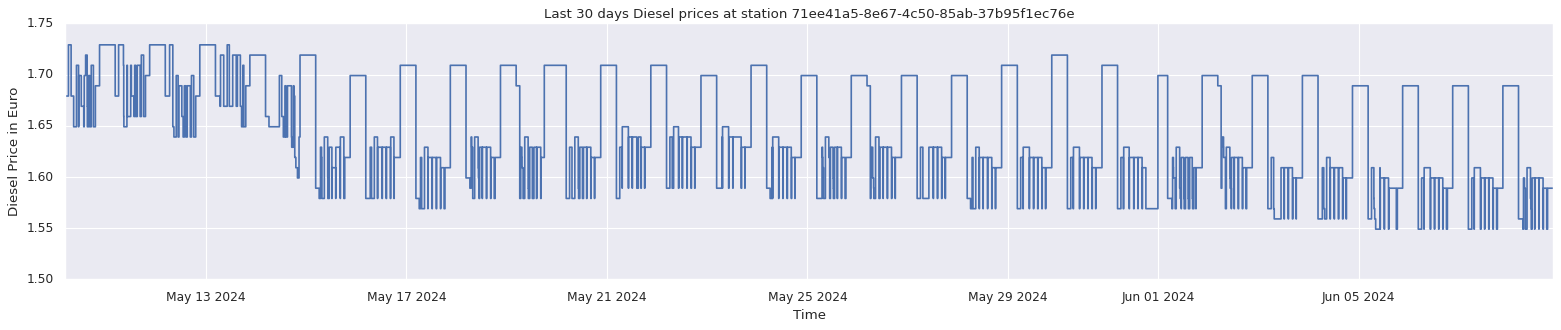

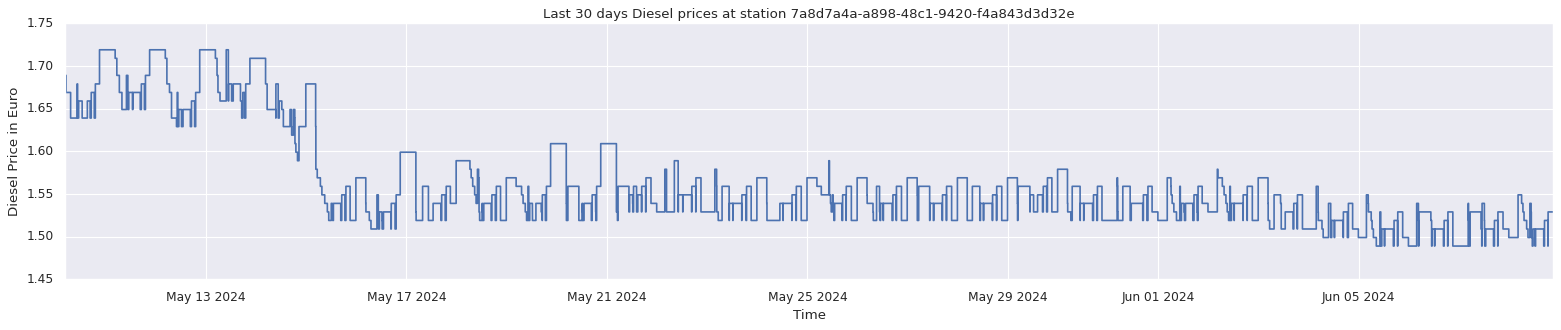

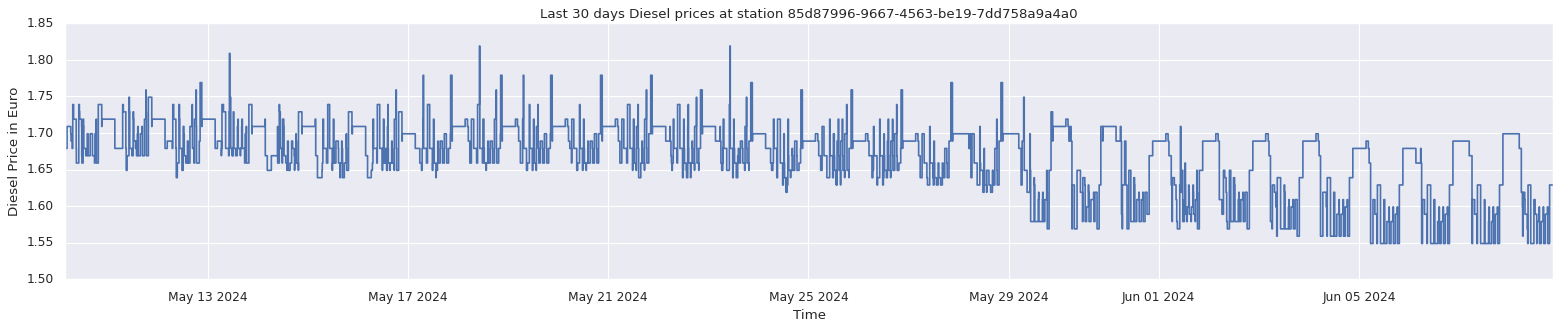

No data for station 8cf0e749-5ebc-4e51-a968-0a40c9d6ac9f


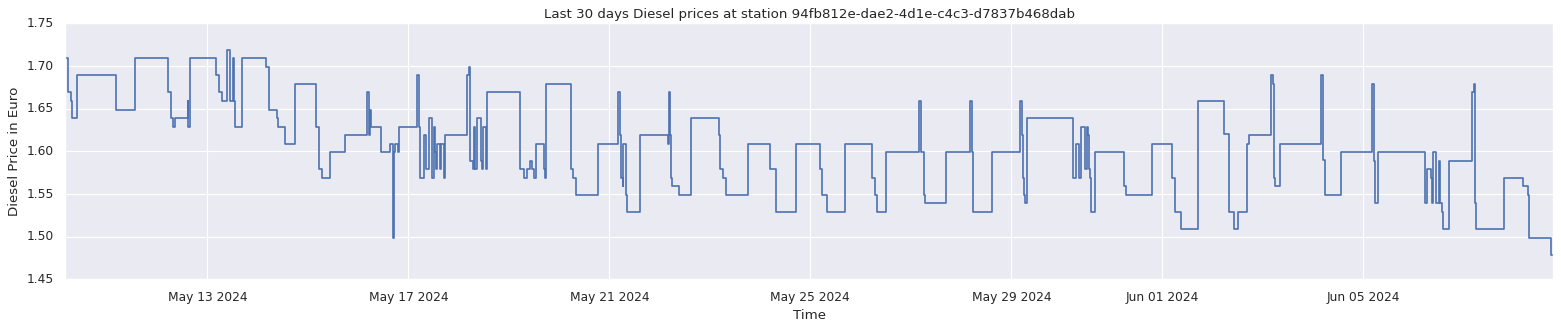

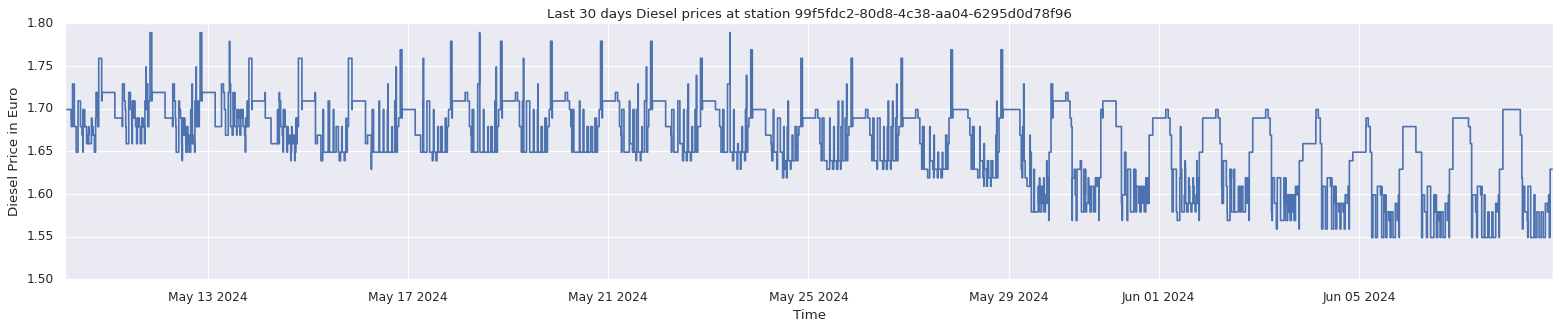

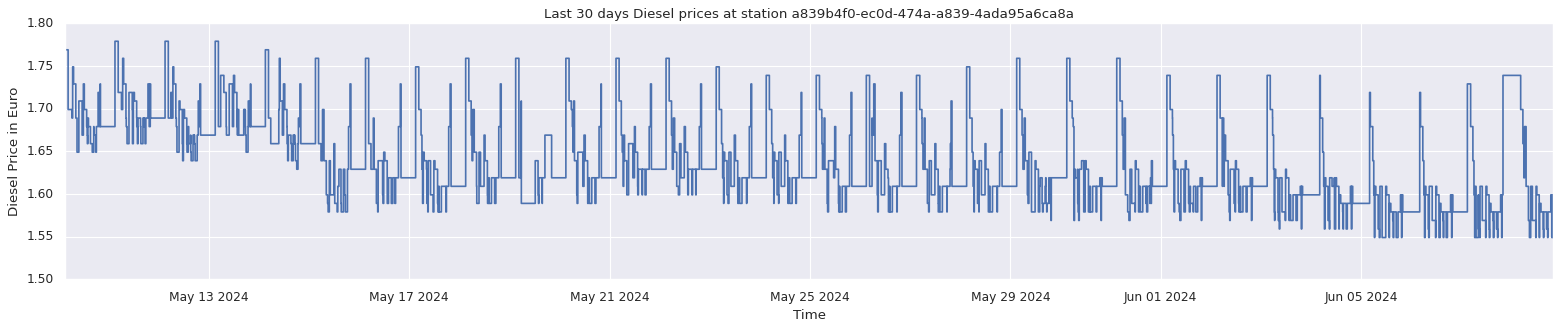

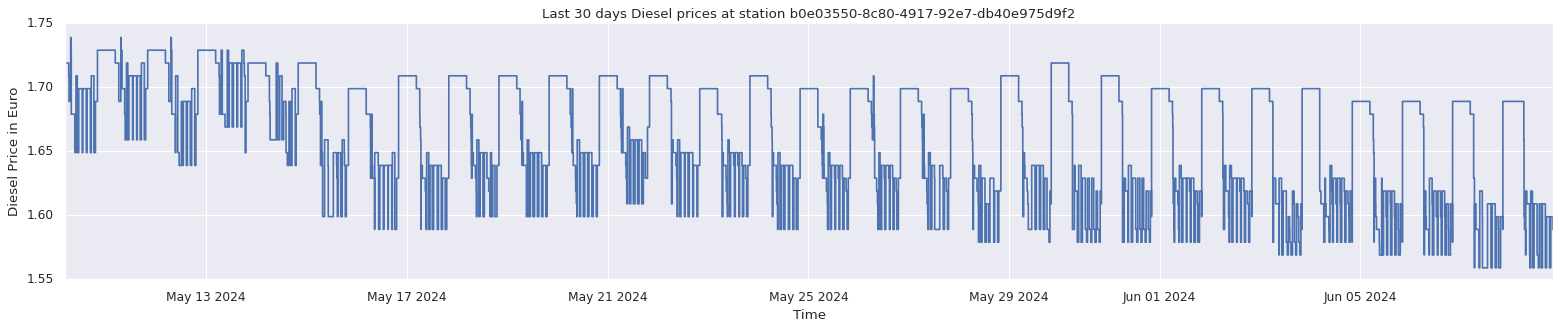

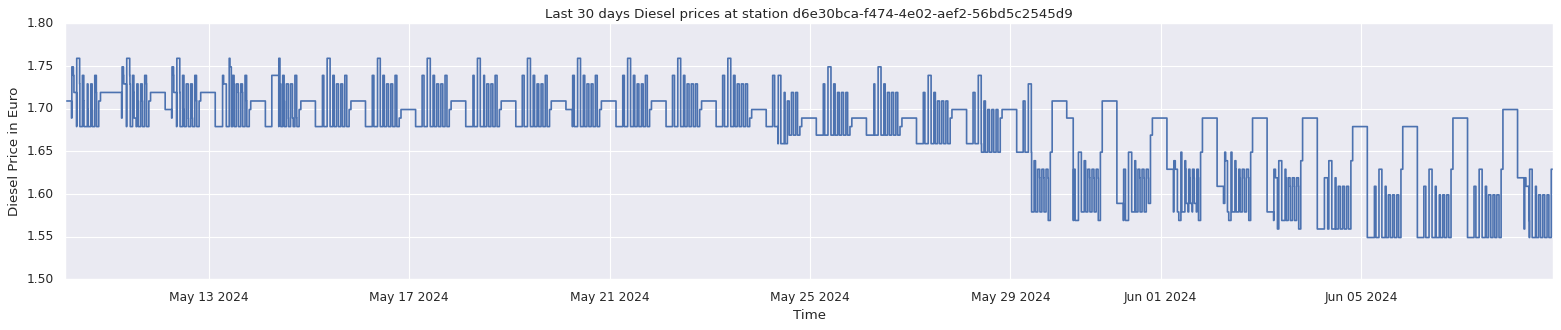

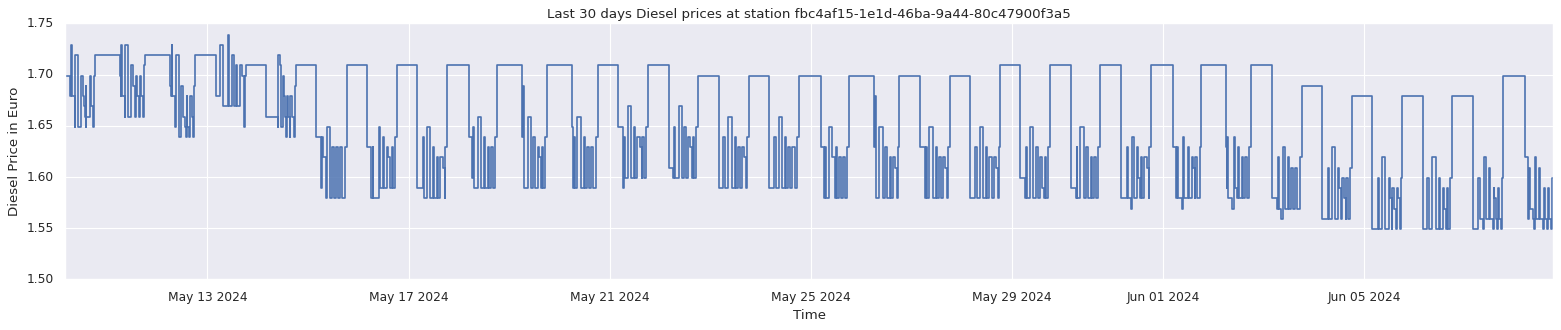

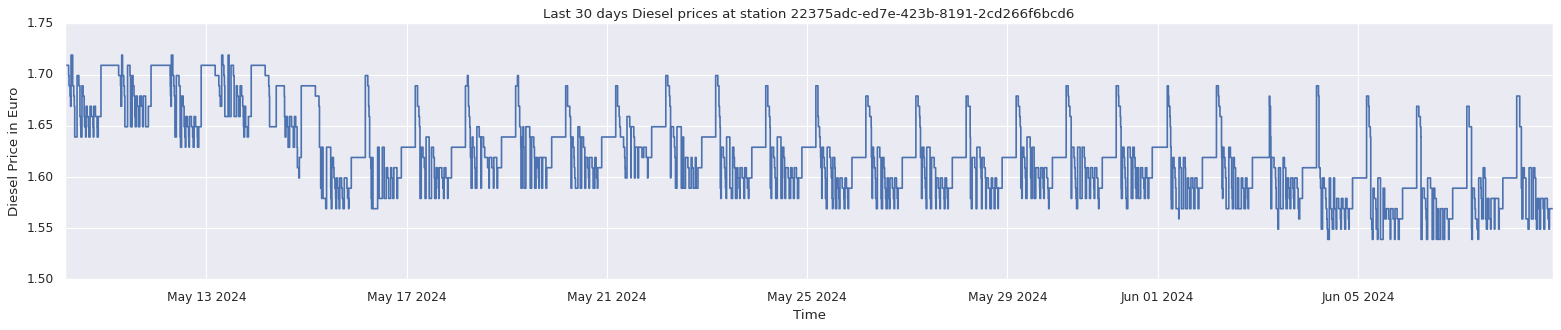

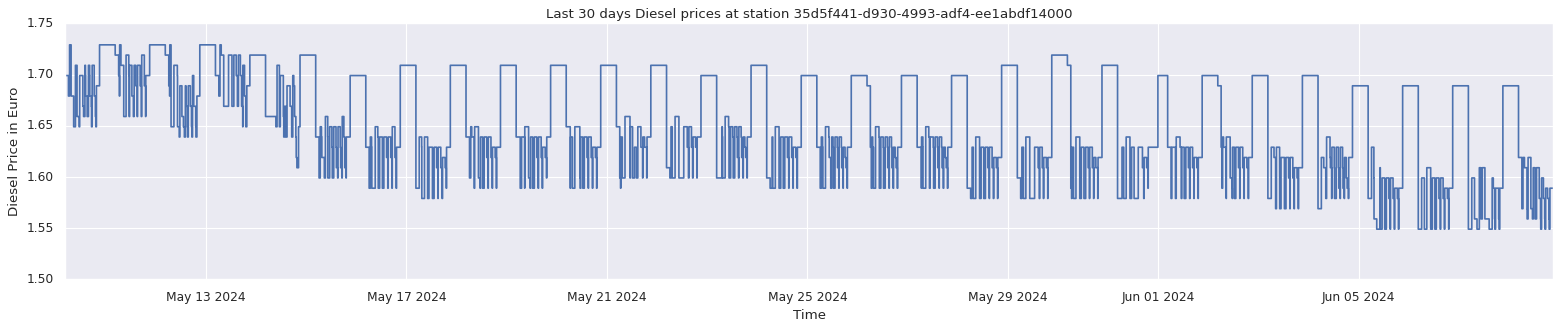

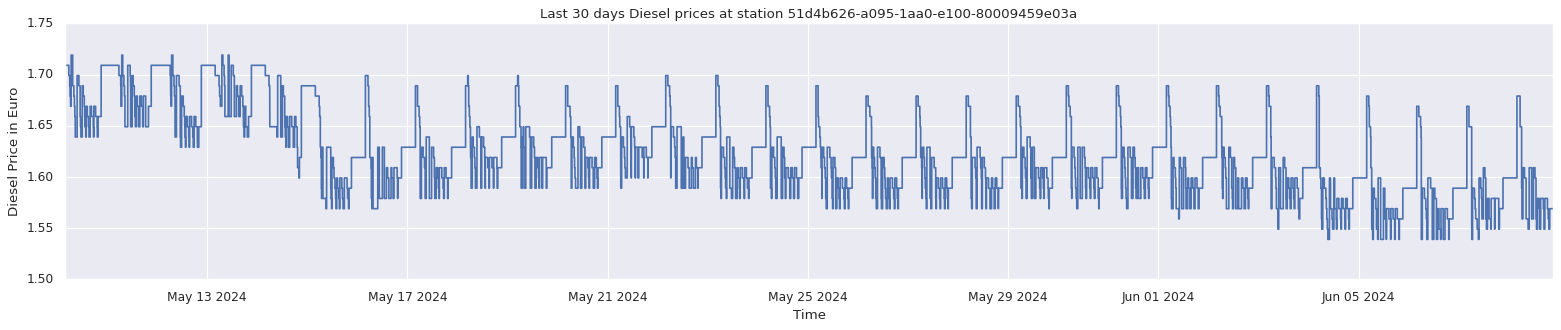

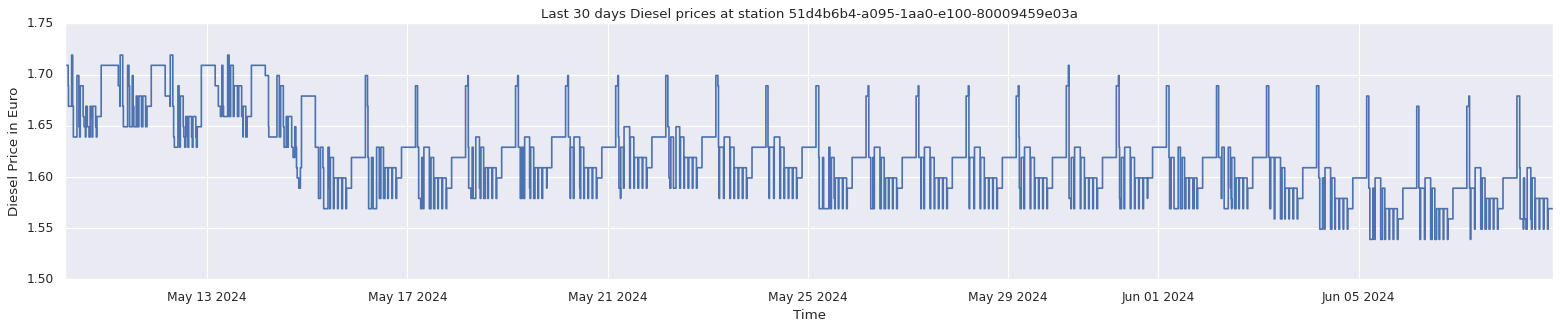

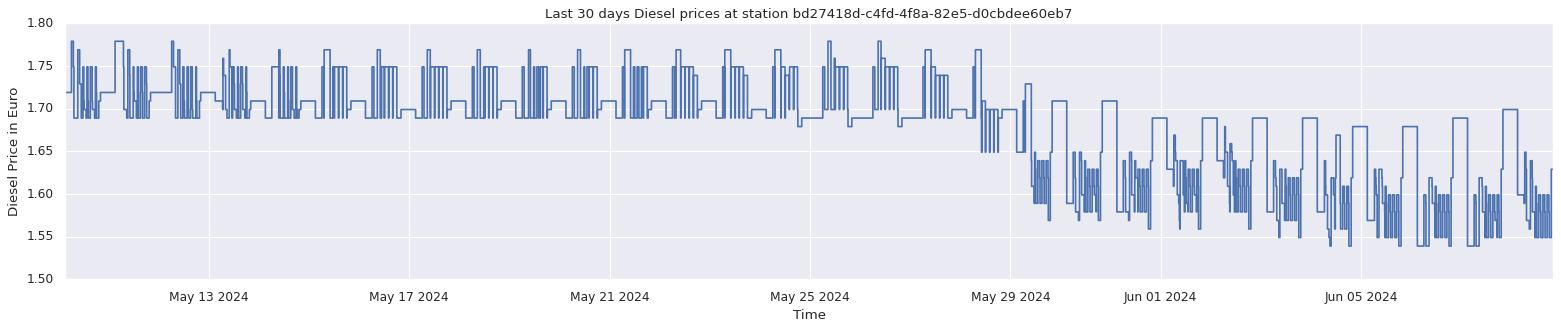

In [14]:
# Style settings for plots
plt.style.use('classic')
sns.set()

# Loop through all station IDs in Pforzheim
for station_id in ids_pf:
    # Filter data for the current station
    df = data[data.station_uuid == station_id]

    # Check if there is data for the station
    if df.empty:
        print(f"No data for station {station_id}")
        continue

    # Creating the plot
    plt.figure(figsize=(24, 4))
    plt.step(df.date, df.diesel, where='pre')

    # Adding titles and labels
    plt.title('Last ' + str(days) + ' days Diesel prices at station ' + station_id)
    plt.xlabel('Time')
    plt.ylabel('Diesel Price in Euro')

    # Show the plot
    plt.show()

In [15]:
# Tankcenter of interest at Autobahnausfahrt Pforzheim Nord
df = data[data.station_uuid==id]

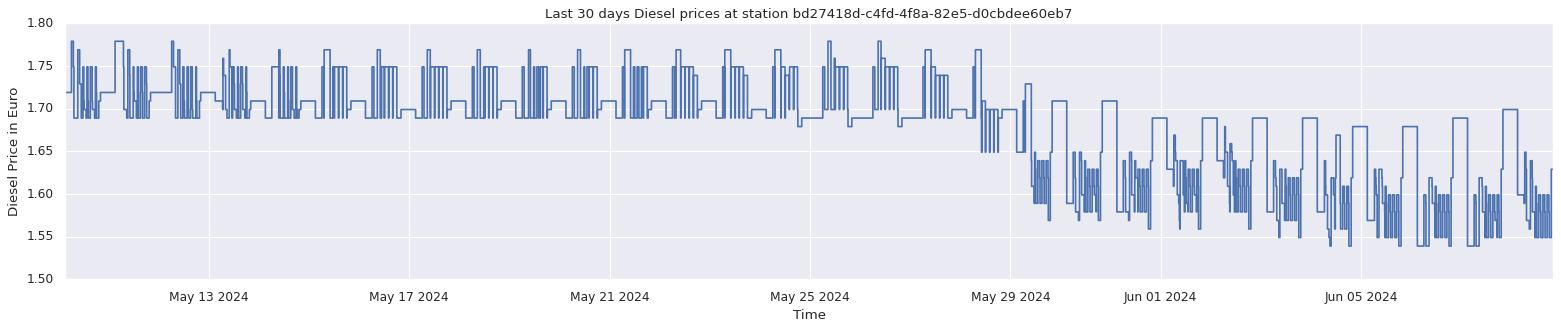

In [16]:
plt.style.use('classic')
sns.set()

plt.figure(figsize=(24, 4))
plt.step(df.date, df.diesel, where='pre')
# Adding titles and labels
plt.title('Last ' + str(days) + ' days Diesel prices at station ' + id)
plt.xlabel('Time')
plt.ylabel('Diesel Price in Euro')

# Show the plot
plt.show()

Create new columns with extracts of the date time in the Dataframe for our Gas Station

In [17]:
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday
df['minute'] = df['date'].dt.minute
# ignore warnings

<ipython-input-17-492e504c98c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
<ipython-input-17-492e504c98c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['date'].dt.weekday
<ipython-input-17-492e504c98c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [18]:
print(data.head)

<bound method NDFrame.head of                               date                          station_uuid  \
0        2024-05-09 22:01:49+00:00  b78ace98-5bde-4f84-9820-8abd807e9644   
1        2024-05-09 22:01:49+00:00  cf407ea4-797b-47d0-a135-c092b0af88c0   
2        2024-05-09 22:01:49+00:00  a30fba5d-ccbf-4609-a6a3-106dab6c7964   
3        2024-05-09 22:01:49+00:00  65b83b5f-f0c5-4db0-8be1-e111cd066276   
4        2024-05-09 22:01:49+00:00  9206797a-d28a-4119-9fa0-211b5413aa2e   
...                            ...                                   ...   
12270669 2024-06-08 21:57:59+00:00  6e6481ca-530c-4cfd-b5cf-2250c71c7d56   
12270670 2024-06-08 21:57:59+00:00  2822fc54-4d03-4a97-a3ab-1b00e04c5f46   
12270671 2024-06-08 21:57:59+00:00  00061284-8d1e-4444-8888-acdc00000001   
12270672 2024-06-08 21:57:59+00:00  af903128-ecaf-412c-835a-fde57a624255   
12270673 2024-06-08 21:57:59+00:00  db307731-f6c4-4c45-9af4-1058e9b23397   

          diesel     e5    e10  dieselchange  e5change  e

Analyse the data for our Gas Station

In [19]:
table = df.groupby('hour').diesel.mean()
print("Best time to get fuel was around " + str(table.idxmin()) + " o'clock.")
print("Average price for Diesel at that time last " + str(days) + " days was " + str(np.round(table.min(), 3)) +"€." )
print("Worst time to get fuel was around " + str(table.idxmax()) + " o'clock.")
print("Average price for Diesel at that time last  " + str(days) + " days was " + str(np.round(table.max(), 3)) + "€.")
print("Price spread was on average " + str(np.round((table.max()-table.min())*100, 1)) + " Cents.")
print("You could save " + str(np.round((table.max()/table.min()-1)*100,1)) + "%." )
print("Good timing is all you need." )


Best time to get fuel was around 15 o'clock.
Average price for Diesel at that time last 30 days was 1.61€.
Worst time to get fuel was around 3 o'clock.
Average price for Diesel at that time last  30 days was 1.701€.
Price spread was on average 9.2 Cents.
You could save 5.7%.
Good timing is all you need.


In [20]:
table = df.groupby('weekday').diesel.mean()
print("Best day to get fuel was " + str(table.idxmin()) + " weekday.")
print("Average price for Diesel at that weekday in the last " + str(days) + " days was " + str(np.round(table.min(), 3)) +"€." )
print("Worst day to get fuel was " + str(table.idxmax()) + " weekday.")
print("Average price for Diesel at that weekday in the last  " + str(days) + " days was " + str(np.round(table.max(), 3)) + "€.")
print("Price spread was on average " + str(np.round((table.max()-table.min())*100, 1)) + " Cents.")
print("You could save " + str(np.round((table.max()/table.min()-1)*100,1)) + "%." )
print("Good timing is all you need." )

Best day to get fuel was 3 weekday.
Average price for Diesel at that weekday in the last 30 days was 1.645€.
Worst day to get fuel was 6 weekday.
Average price for Diesel at that weekday in the last  30 days was 1.685€.
Price spread was on average 3.9 Cents.
You could save 2.4%.
Good timing is all you need.


In [79]:
# Filtern des Datensatzes nach den IDs in ids_pf
df_pf = data[data['station_uuid'].isin(ids_pf)]


Einstellen auf die richtige Zeitzone (+2h MEZ im Sommer)

In [80]:
df_pf['date'] = df_pf['date'].dt.tz_convert('Europe/Berlin')

<ipython-input-80-36fb4a38bc49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pf['date'] = df_pf['date'].dt.tz_convert('Europe/Berlin')


Create new columns with extracts of the date time in the Dataframe for all Gas Stations in Pforzheim

In [81]:
df_pf['hour'] = df_pf['date'].dt.hour
df_pf['weekday'] = df_pf['date'].dt.weekday
df_pf['minute'] = df_pf['date'].dt.minute
# ignore warnings

<ipython-input-81-ecc788a3e3c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pf['hour'] = df_pf['date'].dt.hour
<ipython-input-81-ecc788a3e3c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pf['weekday'] = df_pf['date'].dt.weekday
<ipython-input-81-ecc788a3e3c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [82]:
# Anzeige der ersten Zeilen des gefilterten Datensatzes
print(df_pf.head())

                          date                          station_uuid  diesel  \
2587 2024-05-10 05:03:05+02:00  bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7   1.719   
3126 2024-05-10 05:03:05+02:00  4153a547-046a-410c-a575-968f21f1ce66   1.719   
3127 2024-05-10 05:03:05+02:00  d6e30bca-f474-4e02-aef2-56bd5c2545d9   1.719   
3876 2024-05-10 05:03:05+02:00  a839b4f0-ec0d-474a-a839-4ada95a6ca8a   1.689   
7417 2024-05-10 05:31:13+02:00  99f5fdc2-80d8-4c38-aa04-6295d0d78f96   1.719   

         e5    e10  dieselchange  e5change  e10change  hour  weekday  minute  
2587  1.919  1.859             1         1          1     5        4       3  
3126  1.919  1.859             1         1          1     5        4       3  
3127  1.919  1.859             1         1          1     5        4       3  
3876  1.849  1.789             1         1          1     5        4       3  
7417  1.919  1.859             1         1          1     5        4      31  


Analyze the data of our gas station (Aral)

                              date  diesel     e5    e10  dieselchange  \
2587     2024-05-10 05:03:05+02:00   1.719  1.919  1.859             1   
36143    2024-05-10 08:07:31+02:00   1.719  1.899  1.839             0   
62891    2024-05-10 09:02:10+02:00   1.779  1.959  1.899             1   
70596    2024-05-10 09:13:28+02:00   1.749  1.929  1.869             1   
73560    2024-05-10 09:18:36+02:00   1.749  1.919  1.859             0   
...                            ...     ...    ...    ...           ...   
12196892 2024-06-08 19:10:42+02:00   1.549  1.769  1.709             1   
12217372 2024-06-08 20:02:30+02:00   1.599  1.819  1.759             1   
12222142 2024-06-08 20:12:47+02:00   1.579  1.799  1.739             1   
12243170 2024-06-08 21:11:27+02:00   1.549  1.749  1.689             1   
12257623 2024-06-08 22:01:52+02:00   1.629  1.829  1.769             1   

          e5change  e10change  hour  weekday  minute  
2587             1          1     5        4       3  
3

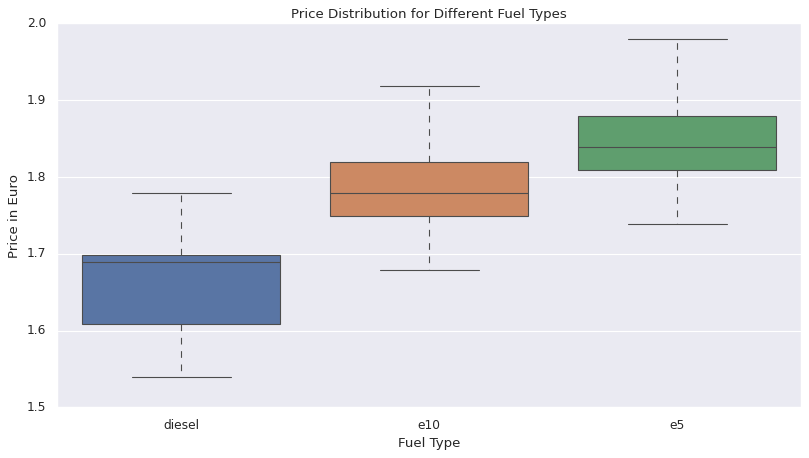

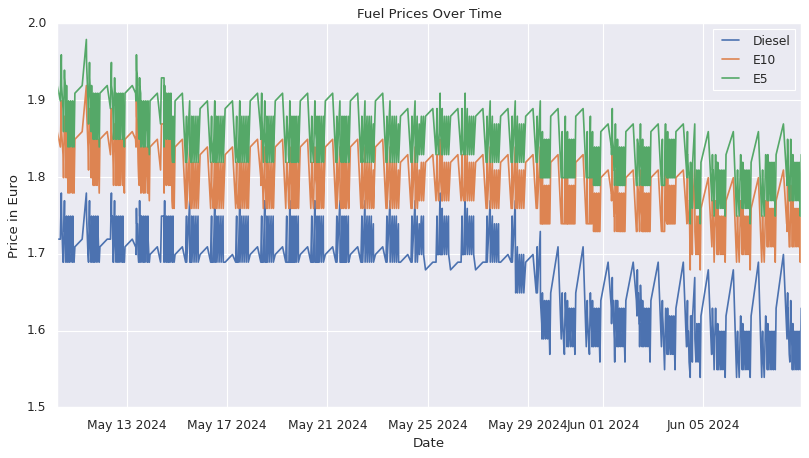

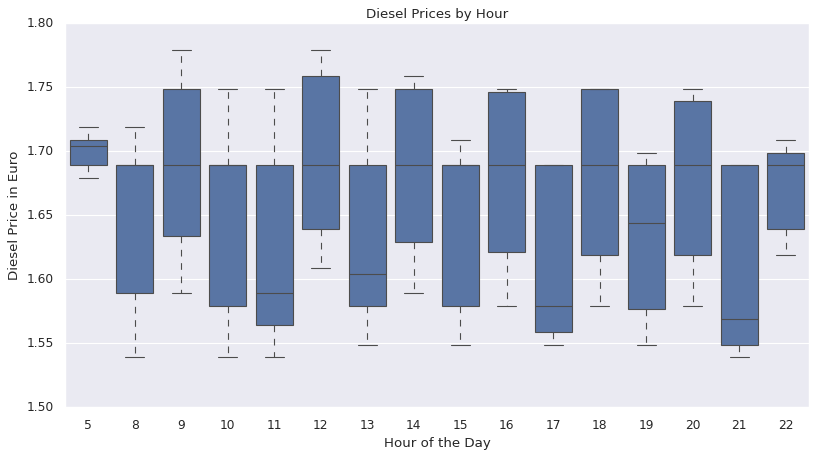

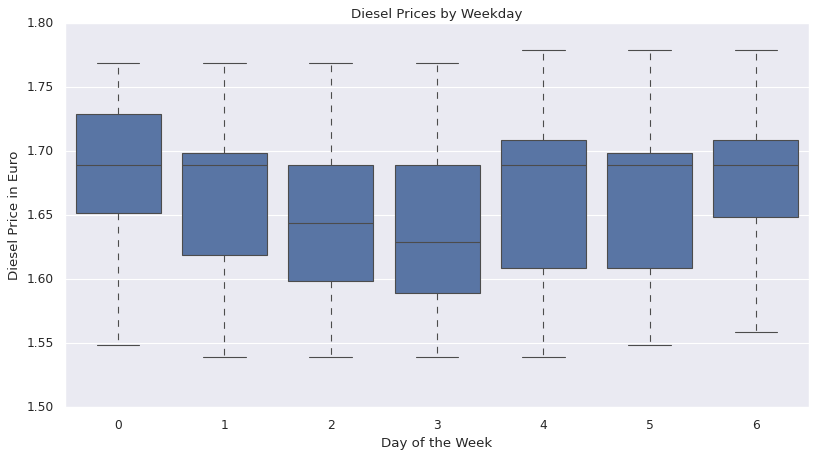

In [83]:
# Importieren der erforderlichen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filtern der Daten für Ihre Tankstelle
df_tankstelle = df_pf[df_pf['station_uuid'] == "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"].copy()

# Entfernen der station_uuid Spalte aus den Berechnungen
df_tankstelle = df_tankstelle.drop(columns=['station_uuid'])
print(df_tankstelle)

# 1. Grundlegende Statistiken
basic_stats = df_tankstelle.describe()
print("Grundlegende Statistiken:")
print(basic_stats)

# 2. Durchschnittliche Preise nach Stunde
avg_price_by_hour = df_tankstelle.groupby('hour').mean()[['diesel', 'e10', 'e5']]
print("Durchschnittliche Preise nach Stunde:")
print(avg_price_by_hour)

# 3. Durchschnittliche Preise nach Wochentag
avg_price_by_weekday = df_tankstelle.groupby('weekday').mean()[['diesel', 'e10', 'e5']]
print("Durchschnittliche Preise nach Wochentag:")
print(avg_price_by_weekday)

# 4. Standardabweichung der Preise nach Stunde
std_price_by_hour = df_tankstelle.groupby('hour').std()[['diesel', 'e10', 'e5']]
print("Standardabweichung der Preise nach Stunde:")
print(std_price_by_hour)

# 5. Standardabweichung der Preise nach Wochentag
std_price_by_weekday = df_tankstelle.groupby('weekday').std()[['diesel', 'e10', 'e5']]
print("Standardabweichung der Preise nach Wochentag:")
print(std_price_by_weekday)

# 6. Anzahl der Preisänderungen
price_changes = df_tankstelle[['diesel', 'e10', 'e5']].nunique() - 1
print("Anzahl der Preisänderungen:")
print(price_changes)

# 7. Minimale und maximale Preise nach Stunde
min_price_by_hour = df_tankstelle.groupby('hour').min()[['diesel', 'e10', 'e5']]
max_price_by_hour = df_tankstelle.groupby('hour').max()[['diesel', 'e10', 'e5']]
print("Minimale Preise nach Stunde:")
print(min_price_by_hour)
print("Maximale Preise nach Stunde:")
print(max_price_by_hour)

# 8. Minimale und maximale Preise nach Wochentag
min_price_by_weekday = df_tankstelle.groupby('weekday').min()[['diesel', 'e10', 'e5']]
max_price_by_weekday = df_tankstelle.groupby('weekday').max()[['diesel', 'e10', 'e5']]
print("Minimale Preise nach Wochentag:")
print(min_price_by_weekday)
print("Maximale Preise nach Wochentag:")
print(max_price_by_weekday)

# 9. Visualisierungen

# Boxplot der Preise nach Kraftstoffart
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_tankstelle[['diesel', 'e10', 'e5']])
plt.title('Price Distribution for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price in Euro')
plt.show()

# Zeitreihenplot der Preise
plt.figure(figsize=(12, 6))
plt.plot(df_tankstelle['date'], df_tankstelle['diesel'], label='Diesel')
plt.plot(df_tankstelle['date'], df_tankstelle['e10'], label='E10')
plt.plot(df_tankstelle['date'], df_tankstelle['e5'], label='E5')
plt.title('Fuel Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in Euro')
plt.legend()
plt.show()

# Boxplot der Preise nach Stunde
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='diesel', data=df_tankstelle)
plt.title('Diesel Prices by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Diesel Price in Euro')
plt.show()

# Boxplot der Preise nach Wochentag
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='diesel', data=df_tankstelle)
plt.title('Diesel Prices by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Diesel Price in Euro')
plt.show()


Analyze the Data for all Gas Stations in Pforzheim

In [25]:
table_pf = df_pf.groupby('hour').diesel.mean()
print("Best time to get fuel was around " + str(table_pf.idxmin()) + " o'clock.")
print("Average price for Diesel at that time last " + str(days) + " days was " + str(np.round(table_pf.min(), 3)) +"€." )
print("Worst time to get fuel was around " + str(table_pf.idxmax()) + " o'clock.")
print("Average price for Diesel at that time last  " + str(days) + " days was " + str(np.round(table_pf.max(), 3)) + "€.")
print("Price spread was on average " + str(np.round((table_pf.max()-table_pf.min())*100, 1)) + " Cents.")
print("You could save " + str(np.round((table_pf.max()/table_pf.min()-1)*100,1)) + "%." )
print("Good timing is all you need." )

Best time to get fuel was around 1 o'clock.
Average price for Diesel at that time last 30 days was 1.531€.
Worst time to get fuel was around 5 o'clock.
Average price for Diesel at that time last  30 days was 1.668€.
Price spread was on average 13.8 Cents.
You could save 9.0%.
Good timing is all you need.


In [26]:
table_pf = df_pf.groupby('weekday').diesel.mean()
print("Best day to get fuel was " + str(table_pf.idxmin()) + " weekday.")
print("Average price for Diesel at that weekday in the last " + str(days) + " days was " + str(np.round(table_pf.min(), 3)) +"€." )
print("Worst day to get fuel was " + str(table_pf.idxmax()) + " weekday.")
print("Average price for Diesel at that weekday in the last  " + str(days) + " days was " + str(np.round(table_pf.max(), 3)) + "€.")
print("Price spread was on average " + str(np.round((table_pf.max()-table_pf.min())*100, 1)) + " Cents.")
print("You could save " + str(np.round((table_pf.max()/table_pf.min()-1)*100,1)) + "%." )
print("Good timing is all you need." )

Best day to get fuel was 3 weekday.
Average price for Diesel at that weekday in the last 30 days was 1.609€.
Worst day to get fuel was 0 weekday.
Average price for Diesel at that weekday in the last  30 days was 1.636€.
Price spread was on average 2.7 Cents.
You could save 1.7%.
Good timing is all you need.


Clusteranalyse

Benötigte Bibliotheken laden

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Vorbereitende Berechnungen

In [64]:
import pandas as pd

# Berechnung der Durchschnittspreise nach Stunde für Diesel
avg_price_by_hour_diesel = df_pf.groupby(['station_uuid', 'hour']).diesel.mean().unstack().reindex(columns=range(24))

# Berechnung der Durchschnittspreise nach Wochentag für Diesel
avg_price_by_weekday_diesel = df_pf.groupby(['station_uuid', 'weekday']).diesel.mean().unstack().reindex(columns=range(7))

# Berechnung der Durchschnittspreise nach Stunde für E10
avg_price_by_hour_e10 = df_pf.groupby(['station_uuid', 'hour']).e10.mean().unstack().reindex(columns=range(24))

# Berechnung der Durchschnittspreise nach Wochentag für E10
avg_price_by_weekday_e10 = df_pf.groupby(['station_uuid', 'weekday']).e10.mean().unstack().reindex(columns=range(7))

# Berechnung der Durchschnittspreise nach Stunde für E5
avg_price_by_hour_e5 = df_pf.groupby(['station_uuid', 'hour']).e5.mean().unstack().reindex(columns=range(24))

# Berechnung der Durchschnittspreise nach Wochentag für E5
avg_price_by_weekday_e5 = df_pf.groupby(['station_uuid', 'weekday']).e5.mean().unstack().reindex(columns=range(7))

# Berechnung der minimalen und maximalen Preise nach Stunde für Diesel
min_price_by_hour_diesel = df_pf.groupby(['station_uuid', 'hour']).diesel.min().unstack().reindex(columns=range(24))
max_price_by_hour_diesel = df_pf.groupby(['station_uuid', 'hour']).diesel.max().unstack().reindex(columns=range(24))

# Berechnung der minimalen und maximalen Preise nach Wochentag für Diesel
min_price_by_weekday_diesel = df_pf.groupby(['station_uuid', 'weekday']).diesel.min().unstack().reindex(columns=range(7))
max_price_by_weekday_diesel = df_pf.groupby(['station_uuid', 'weekday']).diesel.max().unstack().reindex(columns=range(7))

# Berechnung der minimalen und maximalen Preise nach Stunde für E10
min_price_by_hour_e10 = df_pf.groupby(['station_uuid', 'hour']).e10.min().unstack().reindex(columns=range(24))
max_price_by_hour_e10 = df_pf.groupby(['station_uuid', 'hour']).e10.max().unstack().reindex(columns=range(24))

# Berechnung der minimalen und maximalen Preise nach Wochentag für E10
min_price_by_weekday_e10 = df_pf.groupby(['station_uuid', 'weekday']).e10.min().unstack().reindex(columns=range(7))
max_price_by_weekday_e10 = df_pf.groupby(['station_uuid', 'weekday']).e10.max().unstack().reindex(columns=range(7))

# Berechnung der minimalen und maximalen Preise nach Stunde für E5
min_price_by_hour_e5 = df_pf.groupby(['station_uuid', 'hour']).e5.min().unstack().reindex(columns=range(24))
max_price_by_hour_e5 = df_pf.groupby(['station_uuid', 'hour']).e5.max().unstack().reindex(columns=range(24))

# Berechnung der minimalen und maximalen Preise nach Wochentag für E5
min_price_by_weekday_e5 = df_pf.groupby(['station_uuid', 'weekday']).e5.min().unstack().reindex(columns=range(7))
max_price_by_weekday_e5 = df_pf.groupby(['station_uuid', 'weekday']).e5.max().unstack().reindex(columns=range(7))

# Berechnung der Standardabweichung der Preise
std_price_diesel = df_pf.groupby('station_uuid').diesel.std()
std_price_e10 = df_pf.groupby('station_uuid').e10.std()
std_price_e5 = df_pf.groupby('station_uuid').e5.std()

# Berechnung der Anzahl der Preisänderungen
price_changes_diesel = df_pf.groupby('station_uuid').diesel.nunique()
price_changes_e10 = df_pf.groupby('station_uuid').e10.nunique()
price_changes_e5 = df_pf.groupby('station_uuid').e5.nunique()


Überprüfen der Berechnungen/Betrachtung der Ergebnisse

In [65]:
print(avg_price_by_hour_diesel.head())

hour                                  0      1   2   3   4         5   \
station_uuid                                                            
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1 NaN    NaN NaN NaN NaN       NaN   
0dc6786a-38e4-4576-8848-335975dea87b NaN    NaN NaN NaN NaN  1.695667   
22375adc-ed7e-423b-8191-2cd266f6bcd6 NaN    NaN NaN NaN NaN       NaN   
35d5f441-d930-4993-adf4-ee1abdf14000 NaN  1.629 NaN NaN NaN       NaN   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af NaN    NaN NaN NaN NaN  1.465667   

hour                                        6         7         8         9   \
station_uuid                                                                   
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1  1.657780  1.642333  1.601800  1.621703   
0dc6786a-38e4-4576-8848-335975dea87b  1.701963       NaN  1.623384  1.667406   
22375adc-ed7e-423b-8191-2cd266f6bcd6  1.638655  1.678420  1.629252  1.615000   
35d5f441-d930-4993-adf4-ee1abdf14000  1.706667       NaN  1.621857  1.637772   
3fe8dc63

Erstellung eines DataFrames für die Clusteranalyse

In [31]:
# Feature DataFrame erstellen und station_uuid beibehalten
features = pd.DataFrame({
    'station_uuid': avg_price_by_hour_diesel.index,
    'avg_price_by_hour_diesel': avg_price_by_hour_diesel.mean(axis=1),
    'avg_price_by_hour_e10': avg_price_by_hour_e10.mean(axis=1),
    'avg_price_by_hour_e5': avg_price_by_hour_e5.mean(axis=1),
    'avg_price_by_weekday_diesel': avg_price_by_weekday_diesel.mean(axis=1),
    'avg_price_by_weekday_e10': avg_price_by_weekday_e10.mean(axis=1),
    'avg_price_by_weekday_e5': avg_price_by_weekday_e5.mean(axis=1),
    'min_price_by_hour_diesel': min_price_by_hour_diesel.min(axis=1),
    'max_price_by_hour_diesel': max_price_by_hour_diesel.max(axis=1),
    'min_price_by_hour_e10': min_price_by_hour_e10.min(axis=1),
    'max_price_by_hour_e10': max_price_by_hour_e10.max(axis=1),
    'min_price_by_hour_e5': min_price_by_hour_e5.min(axis=1),
    'max_price_by_hour_e5': max_price_by_hour_e5.max(axis=1),
    'min_price_by_weekday_diesel': min_price_by_weekday_diesel.min(axis=1),
    'max_price_by_weekday_diesel': max_price_by_weekday_diesel.max(axis=1),
    'min_price_by_weekday_e10': min_price_by_weekday_e10.min(axis=1),
    'max_price_by_weekday_e10': max_price_by_weekday_e10.max(axis=1),
    'min_price_by_weekday_e5': min_price_by_weekday_e5.min(axis=1),
    'max_price_by_weekday_e5': max_price_by_weekday_e5.max(axis=1),
    'std_price_diesel': std_price_diesel.values,
    'std_price_e10': std_price_e10.values,
    'std_price_e5': std_price_e5.values,
    'price_changes_diesel': price_changes_diesel.values,
    'price_changes_e10': price_changes_e10.values,
    'price_changes_e5': price_changes_e5.values
})




In [32]:
# Ausgabe des Features DataFrame
print(avg_price_by_hour_diesel)

hour                                     0         1   2   3      4   \
station_uuid                                                           
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1    NaN       NaN NaN NaN    NaN   
0dc6786a-38e4-4576-8848-335975dea87b    NaN       NaN NaN NaN    NaN   
22375adc-ed7e-423b-8191-2cd266f6bcd6    NaN       NaN NaN NaN    NaN   
35d5f441-d930-4993-adf4-ee1abdf14000    NaN  1.629000 NaN NaN    NaN   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af    NaN       NaN NaN NaN    NaN   
4153a547-046a-410c-a575-968f21f1ce66    NaN       NaN NaN NaN    NaN   
51d4b626-a095-1aa0-e100-80009459e03a    NaN       NaN NaN NaN    NaN   
51d4b6b4-a095-1aa0-e100-80009459e03a    NaN       NaN NaN NaN    NaN   
615f2d73-5214-47f2-8691-e4a8134380bb    NaN       NaN NaN NaN    NaN   
6657358a-cf8c-4d8a-b4ec-a835271041ac  1.619       NaN NaN NaN    NaN   
71ee41a5-8e67-4c50-85ab-37b95f1ec76e    NaN  1.569000 NaN NaN    NaN   
7a8d7a4a-a898-48c1-9420-f4a843d3d32e    NaN  1.524455 NaN NaN   

In [33]:
print(avg_price_by_weekday_diesel)

weekday                                      0         1         2         3  \
station_uuid                                                                   
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1  1.621571  1.614588  1.595912  1.591576   
0dc6786a-38e4-4576-8848-335975dea87b  1.655346  1.650429  1.637437  1.636813   
22375adc-ed7e-423b-8191-2cd266f6bcd6  1.620257  1.610806  1.596417  1.597897   
35d5f441-d930-4993-adf4-ee1abdf14000  1.639714  1.628505  1.613500  1.614248   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af  1.530818  1.516632  1.492604  1.483211   
4153a547-046a-410c-a575-968f21f1ce66  1.664873  1.655452  1.637629  1.634200   
51d4b626-a095-1aa0-e100-80009459e03a  1.621184  1.612804  1.596516  1.596097   
51d4b6b4-a095-1aa0-e100-80009459e03a  1.623138  1.610084  1.593744  1.594696   
615f2d73-5214-47f2-8691-e4a8134380bb  1.622125  1.614055  1.597387  1.595786   
6657358a-cf8c-4d8a-b4ec-a835271041ac  1.628227  1.620186  1.605000  1.604029   
71ee41a5-8e67-4c50-85ab-37b95f1ec76e  1.

In [34]:
print(max_price_by_weekday_diesel)

weekday                                   0      1      2      3      4  \
station_uuid                                                              
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1  1.719  1.699  1.699  1.699  1.719   
0dc6786a-38e4-4576-8848-335975dea87b  1.759  1.759  1.759  1.759  1.759   
22375adc-ed7e-423b-8191-2cd266f6bcd6  1.719  1.709  1.699  1.699  1.719   
35d5f441-d930-4993-adf4-ee1abdf14000  1.729  1.719  1.719  1.719  1.729   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af  1.719  1.709  1.619  1.529  1.719   
4153a547-046a-410c-a575-968f21f1ce66  1.739  1.729  1.729  1.729  1.759   
51d4b626-a095-1aa0-e100-80009459e03a  1.719  1.709  1.699  1.699  1.719   
51d4b6b4-a095-1aa0-e100-80009459e03a  1.719  1.709  1.699  1.709  1.719   
615f2d73-5214-47f2-8691-e4a8134380bb  1.719  1.699  1.699  1.699  1.719   
6657358a-cf8c-4d8a-b4ec-a835271041ac  1.729  1.709  1.709  1.709  1.729   
71ee41a5-8e67-4c50-85ab-37b95f1ec76e  1.729  1.719  1.719  1.719  1.729   
7a8d7a4a-a898-48c1-9420-f

In [35]:
print(max_price_by_hour_diesel)

hour                                     0      1   2   3      4      5   \
station_uuid                                                               
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1    NaN    NaN NaN NaN    NaN    NaN   
0dc6786a-38e4-4576-8848-335975dea87b    NaN    NaN NaN NaN    NaN  1.709   
22375adc-ed7e-423b-8191-2cd266f6bcd6    NaN    NaN NaN NaN    NaN    NaN   
35d5f441-d930-4993-adf4-ee1abdf14000    NaN  1.629 NaN NaN    NaN    NaN   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af    NaN    NaN NaN NaN    NaN  1.489   
4153a547-046a-410c-a575-968f21f1ce66    NaN    NaN NaN NaN    NaN  1.719   
51d4b626-a095-1aa0-e100-80009459e03a    NaN    NaN NaN NaN    NaN  1.709   
51d4b6b4-a095-1aa0-e100-80009459e03a    NaN    NaN NaN NaN    NaN  1.709   
615f2d73-5214-47f2-8691-e4a8134380bb    NaN    NaN NaN NaN    NaN    NaN   
6657358a-cf8c-4d8a-b4ec-a835271041ac  1.619    NaN NaN NaN    NaN  1.719   
71ee41a5-8e67-4c50-85ab-37b95f1ec76e    NaN  1.569 NaN NaN    NaN    NaN   
7a8d7a4a-a89

In [36]:
print(df_pf.head)

<bound method NDFrame.head of                               date                          station_uuid  \
2587     2024-05-10 05:03:05+02:00  bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7   
3126     2024-05-10 05:03:05+02:00  4153a547-046a-410c-a575-968f21f1ce66   
3127     2024-05-10 05:03:05+02:00  d6e30bca-f474-4e02-aef2-56bd5c2545d9   
3876     2024-05-10 05:03:05+02:00  a839b4f0-ec0d-474a-a839-4ada95a6ca8a   
7417     2024-05-10 05:31:13+02:00  99f5fdc2-80d8-4c38-aa04-6295d0d78f96   
...                            ...                                   ...   
12266908 2024-06-08 23:12:26+02:00  51d4b6b4-a095-1aa0-e100-80009459e03a   
12267234 2024-06-08 23:12:26+02:00  51d4b626-a095-1aa0-e100-80009459e03a   
12268952 2024-06-08 23:20:40+02:00  6657358a-cf8c-4d8a-b4ec-a835271041ac   
12270041 2024-06-08 23:34:18+02:00  22375adc-ed7e-423b-8191-2cd266f6bcd6   
12270506 2024-06-08 23:45:36+02:00  3fe8dc63-1663-430f-bcc3-5bdbf281d3af   

          diesel     e5    e10  dieselchange  e5change  e

Skalieren der Features

In [37]:
# Skalieren der Features (außer station_uuid)
from sklearn.preprocessing import StandardScaler

# Auswahl der numerischen Features für die Skalierung
numeric_features = features.drop(columns=['station_uuid'])

# Skalierung der numerischen Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Erstellen eines neuen DataFrames für die skalierten Features
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)
scaled_features_df['station_uuid'] = features['station_uuid'].values

# Sicherstellen, dass die Reihenfolge der Spalten korrekt ist
scaled_features_df = scaled_features_df[['station_uuid'] + list(numeric_features.columns)]


Bestimmung der optimalen Anzahl an Clustern mit Hilfe der Silhouette Scores (Vorbereitung)

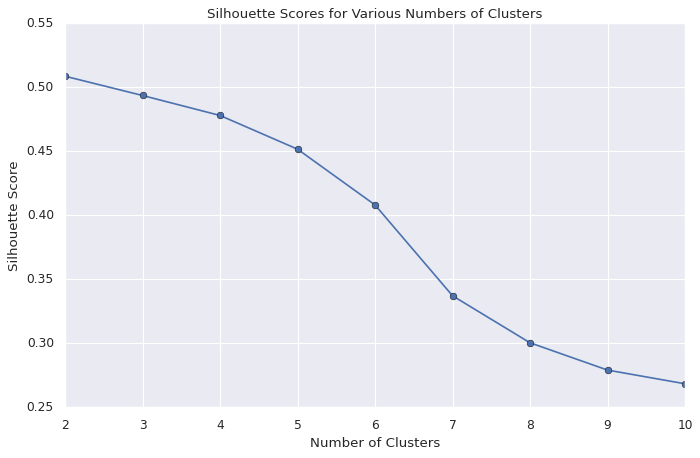

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_silhouette(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    return silhouette_scores

# Berechnung der Silhouette Scores für eine Reihe von Cluster-Anzahlen
max_k = 10
silhouette_scores = calculate_silhouette(scaled_features, max_k)

# Plot der Silhouette Scores gegen die Anzahl der Cluster
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.show()


Bestimmung der Clusterzahl

In [39]:
# Bestimmung der optimalen Anzahl der Cluster
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


Durchführung der Clusteranalyse mit kMeans

In [40]:
# Durchführung der Clusteranalyse mit der optimalen Anzahl von Clustern
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(scaled_features)

# Hinzufügen der Cluster-Labels zum DataFrame
features['cluster'] = kmeans.labels_

Prüfen, welche Tankstelle in welchem Cluster ist

In [41]:
# Überprüfen, welche Tankstelle in welchem Cluster ist
print(features[['station_uuid', 'cluster']])

                                                              station_uuid  \
station_uuid                                                                 
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1  0be32f00-8ff4-45bf-bb4c-1588d6e03aa1   
0dc6786a-38e4-4576-8848-335975dea87b  0dc6786a-38e4-4576-8848-335975dea87b   
22375adc-ed7e-423b-8191-2cd266f6bcd6  22375adc-ed7e-423b-8191-2cd266f6bcd6   
35d5f441-d930-4993-adf4-ee1abdf14000  35d5f441-d930-4993-adf4-ee1abdf14000   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af  3fe8dc63-1663-430f-bcc3-5bdbf281d3af   
4153a547-046a-410c-a575-968f21f1ce66  4153a547-046a-410c-a575-968f21f1ce66   
51d4b626-a095-1aa0-e100-80009459e03a  51d4b626-a095-1aa0-e100-80009459e03a   
51d4b6b4-a095-1aa0-e100-80009459e03a  51d4b6b4-a095-1aa0-e100-80009459e03a   
615f2d73-5214-47f2-8691-e4a8134380bb  615f2d73-5214-47f2-8691-e4a8134380bb   
6657358a-cf8c-4d8a-b4ec-a835271041ac  6657358a-cf8c-4d8a-b4ec-a835271041ac   
71ee41a5-8e67-4c50-85ab-37b95f1ec76e  71ee41a5-8e67-4c50-85ab-37

Visualisierung der Cluster

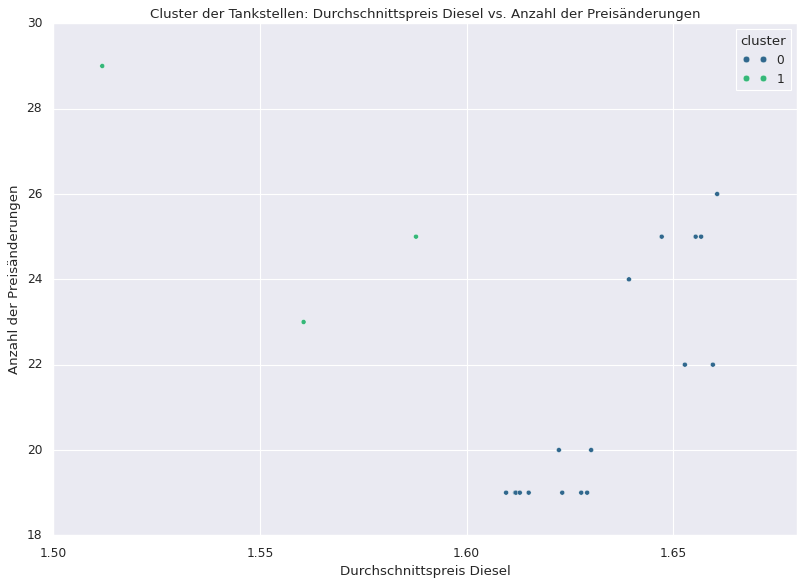

In [42]:
# Visualisierung der Cluster (Beispiel: Durchschnittspreis Diesel vs. Anzahl der Preisänderungen)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_price_by_hour_diesel', y='price_changes_diesel', hue='cluster', data=features, palette='viridis')
plt.title('Cluster der Tankstellen: Durchschnittspreis Diesel vs. Anzahl der Preisänderungen')
plt.xlabel('Durchschnittspreis Diesel')
plt.ylabel('Anzahl der Preisänderungen')
plt.show()

3D Scatterplot

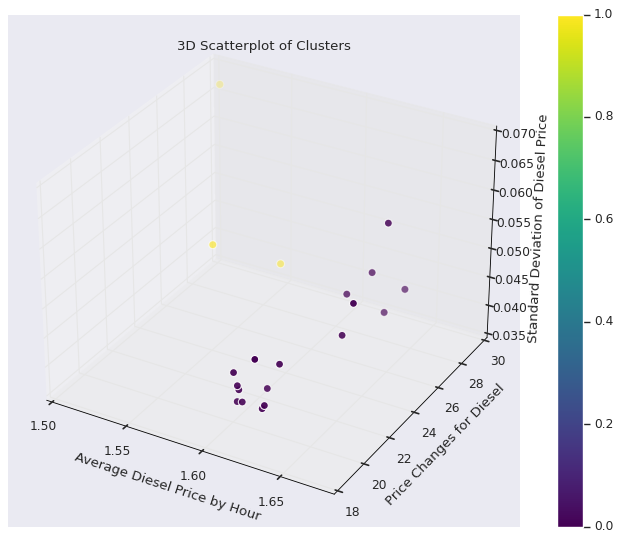

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Auswahl von drei Features für die 3D-Visualisierung
x = features['avg_price_by_hour_diesel']
y = features['price_changes_diesel']
z = features['std_price_diesel']

sc = ax.scatter(x, y, z, c=features['cluster'], cmap='viridis', s=50)
ax.set_xlabel('Average Diesel Price by Hour')
ax.set_ylabel('Price Changes for Diesel')
ax.set_zlabel('Standard Deviation of Diesel Price')
plt.title('3D Scatterplot of Clusters')
plt.colorbar(sc)
plt.show()


Radarchart Visualisierung Cluster

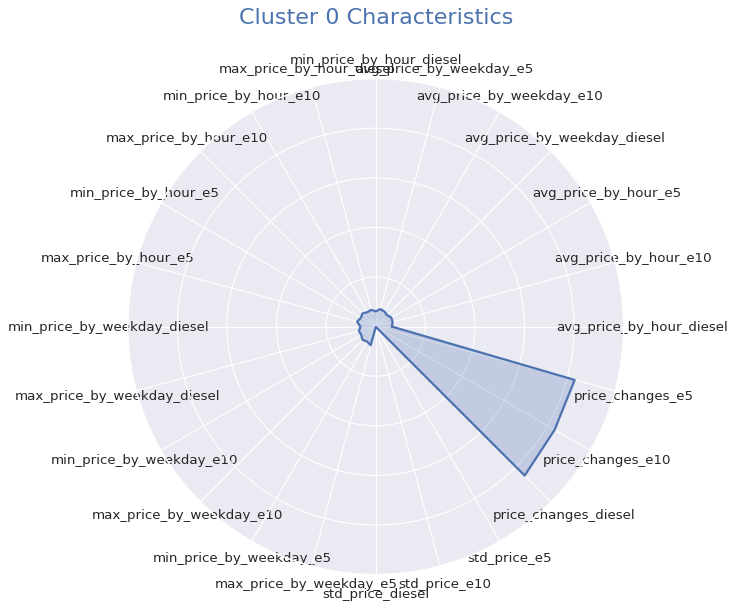

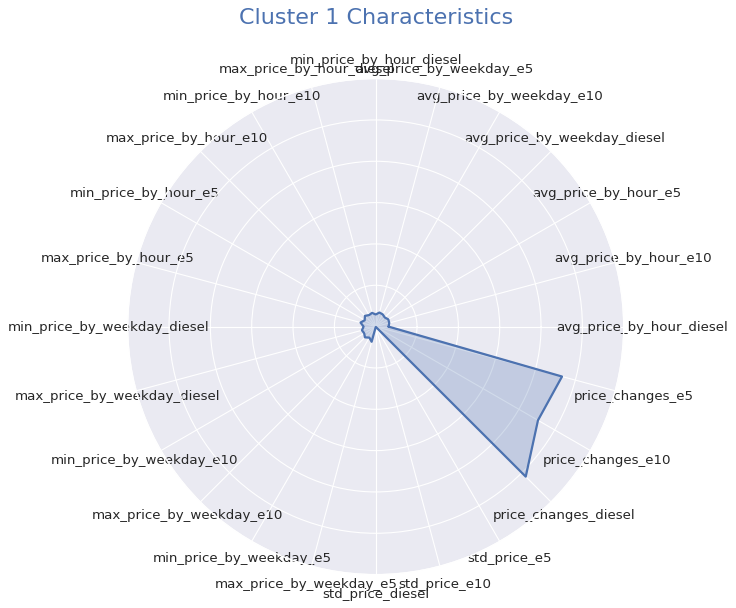

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Beispiel für Radarchart-Datenvorbereitung
def create_radar_chart(df, cluster_num):
    # Berechnung der Mittelwerte der Features für den Cluster
    cluster_data = df[df['cluster'] == cluster_num].drop(columns=['station_uuid', 'cluster']).mean()
    # Auswählen der Features
    features = cluster_data.index
    values = cluster_data.values
    # Hinzufügen des ersten Wertes am Ende der Liste, um das Polygon zu schließen
    values = np.append(values, values[0])

    # Winkel für die Features
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]

    # Plot erstellen
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='b', alpha=0.25)
    ax.plot(angles, values, color='b', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=12)
    plt.title(f'Cluster {cluster_num} Characteristics', size=20, color='b', y=1.1)
    plt.show()

# Radarcharts für jeden Cluster erstellen
for cluster_num in features['cluster'].unique():
    create_radar_chart(features, cluster_num)


Interpretation/Detailanalyse der Clusteranalyse

Berechnung der Clusterzentren

In [45]:
# Berechnung der Clusterzentren
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_features.columns)
cluster_centers_df['cluster'] = range(optimal_k)

# Anpassung der Anzeigeeinstellungen
pd.set_option('display.max_columns', None)

# Anzeige der Clusterzentren
print(cluster_centers_df)




   avg_price_by_hour_diesel  avg_price_by_hour_e10  avg_price_by_hour_e5  \
0                  1.633245               1.760929              1.819900   
1                  1.553383               1.698243              1.757743   

   avg_price_by_weekday_diesel  avg_price_by_weekday_e10  \
0                     1.631558                  1.759345   
1                     1.556989                  1.703078   

   avg_price_by_weekday_e5  min_price_by_hour_diesel  \
0                 1.818324                  1.543118   
1                 1.762469                  1.469000   

   max_price_by_hour_diesel  min_price_by_hour_e10  max_price_by_hour_e10  \
0                  1.747235               1.680176               1.880176   
1                  1.719000               1.609000               1.839000   

   min_price_by_hour_e5  max_price_by_hour_e5  min_price_by_weekday_diesel  \
0              1.740176              1.939588                     1.543118   
1              1.539000          

***Cluster 0***

**Durchschnittspreise pro Stunde:**

Diesel: 1.633245 €
E10: 1.760929 €
E5: 1.819900 €
**Interpretation:** Die Tankstellen in diesem Cluster haben im Durchschnitt höhere Preise für alle Kraftstofftypen. Dies könnte darauf hindeuten, dass sie sich in Gebieten mit weniger Wettbewerb befinden oder dass sie eine Strategie verfolgen, die auf höhere Margen abzielt.

**Durchschnittspreise pro Wochentag:**

Diesel: 1.631558 €
E10: 1.759345 €
E5: 1.818324 €
**Interpretation:** Die Preise sind auch an verschiedenen Wochentagen höher. Dies zeigt eine Konsistenz in der Preisgestaltung, unabhängig vom Wochentag. Dies könnte darauf hindeuten, dass die Tankstellen in diesem Cluster eine stabilere und vorhersehbarere Preisstrategie verfolgen.

**Minimale und maximale Preise pro Stunde:**

Min. Diesel: 1.543118 €
Max. Diesel: 1.747235 €
Min. E10: 1.680176 €
Max. E10: 1.880176 €
Min. E5: 1.740176 €
Max. E5: 1.939588 €
**Interpretation:** Die minimale und maximale Preisspanne ist relativ eng, was darauf hindeutet, dass es weniger Preisschwankungen gibt. Dies könnte auf eine kontrollierte Preisgestaltung hinweisen, möglicherweise aufgrund von weniger dynamischem Wettbewerb oder einer stärkeren Markenkontrolle.

**Minimale und maximale Preise pro Wochentag:**

Min. Diesel: 1.543118 €
Max. Diesel: 1.747235 €
Min. E10: 1.680176 €
Max. E10: 1.880176 €
Min. E5: 1.740176 €
Max. E5: 1.939588 €
**Interpretation:** Ähnlich wie bei den stündlichen Preisen zeigt sich auch hier eine enge Spanne zwischen den minimalen und maximalen Preisen. Dies deutet auf eine geringe Volatilität hin, was für Kunden attraktiv sein könnte, die Wert auf Preisstabilität legen.

**Standardabweichung der Preise:**

Diesel: 0.047225
E10: 0.041195
E5: 0.041063
**Interpretation:** Die niedrigen Standardabweichungen bedeuten, dass die Preise in diesem Cluster weniger schwanken. Dies könnte darauf hindeuten, dass diese Tankstellen weniger auf kurzfristige Preisanpassungen reagieren und stattdessen eine langfristig stabile Preisstrategie verfolgen.

**Anzahl der Preisänderungen:**

Diesel: 21.235294
E10: 20.823529
E5: 20.764706
**Interpretation:** Diese Tankstellen ändern ihre Preise weniger häufig. Dies könnte darauf hindeuten, dass sie sich auf langfristige Kundenbindung durch stabile Preise konzentrieren, anstatt auf kurzfristige Gewinnmaximierung durch häufige Preisänderungen.

***Cluster 1***

**Durchschnittspreise pro Stunde:**

Diesel: 1.553383 €
E10: 1.698243 €
E5: 1.757743 €
**Interpretation:** Die Tankstellen in diesem Cluster haben im Durchschnitt niedrigere Preise für alle Kraftstofftypen. Dies könnte darauf hindeuten, dass sie sich in wettbewerbsintensiveren Gebieten befinden oder dass sie eine aggressive Preispolitik verfolgen, um Kunden anzuziehen.

**Durchschnittspreise pro Wochentag:**

Diesel: 1.556989 €
E10: 1.703078 €
E5: 1.762469 €
**Interpretation:** Die niedrigeren Preise sind auch an verschiedenen Wochentagen konsistent, was auf eine aggressive Preisstrategie hinweist, die darauf abzielt, auch an weniger frequentierten Tagen Kunden zu gewinnen.

**Minimale und maximale Preise pro Stunde:**

Min. Diesel: 1.469000 €
Max. Diesel: 1.719000 €
Min. E10: 1.609000 €
Max. E10: 1.839000 €
Min. E5: 1.539000 €
Max. E5: 1.899000 €
**Interpretation:** Die größere Preisspanne im Vergleich zu Cluster 0 zeigt, dass diese Tankstellen flexibler auf Marktbedingungen reagieren. Dies könnte auf einen intensiveren Wettbewerb hinweisen, der zu häufigeren und größeren Preisanpassungen führt.

**Minimale und maximale Preise pro Wochentag:**

Min. Diesel: 1.469000 €
Max. Diesel: 1.719000 €
Min. E10: 1.609000 €
Max. E10: 1.839000 €
Min. E5: 1.539000 €
Max. E5: 1.899000 €
Interpretation: Auch hier zeigt sich eine größere Preisspanne, was darauf hindeutet, dass die Preisgestaltung stärker von den täglichen Marktbedingungen beeinflusst wird. Dies könnte für preisbewusste Kunden attraktiv sein, die bereit sind, ihre Tankzeiten zu variieren, um von niedrigeren Preisen zu profitieren.

Standardabweichung der Preise:

Diesel: 0.058132
E10: 0.045001
E5: 0.048538
Interpretation: Die höheren Standardabweichungen bedeuten, dass die Preise in diesem Cluster volatiler sind. Dies könnte darauf hindeuten, dass die Tankstellen in diesem Cluster häufiger auf kurzfristige Marktveränderungen reagieren, um wettbewerbsfähig zu bleiben.

Anzahl der Preisänderungen:

Diesel: 25.666667
E10: 22.666667
E5: 23.333333
Interpretation: Diese Tankstellen ändern ihre Preise häufiger. Dies deutet auf eine dynamische Preisstrategie hin, die versucht, Kunden durch häufige Anpassungen der Preise anzuziehen und auf kurzfristige Marktveränderungen zu reagieren.

Zusammenfassung und Empfehlungen
Cluster 0 repräsentiert Tankstellen mit stabileren und höheren Preisen, weniger Preisschwankungen und weniger Preisänderungen. Diese Tankstellen könnten auf langfristige Kundenbindung und Stabilität setzen. Eine mögliche Strategie könnte sein, auf Qualität und Service zu setzen, um die höheren Preise zu rechtfertigen.

Cluster 1 repräsentiert Tankstellen mit niedrigeren, aber volatileren Preisen, häufigeren Preisänderungen und größeren Preisspannen. Diese Tankstellen könnten in wettbewerbsintensiven Gebieten liegen und eine aggressive Preispolitik verfolgen, um Marktanteile zu gewinnen. Eine mögliche Strategie könnte sein, durch regelmäßige Preisaktionen und Angebote Kunden zu binden.

Radarchart zur Visualisierung der Clusterzentren

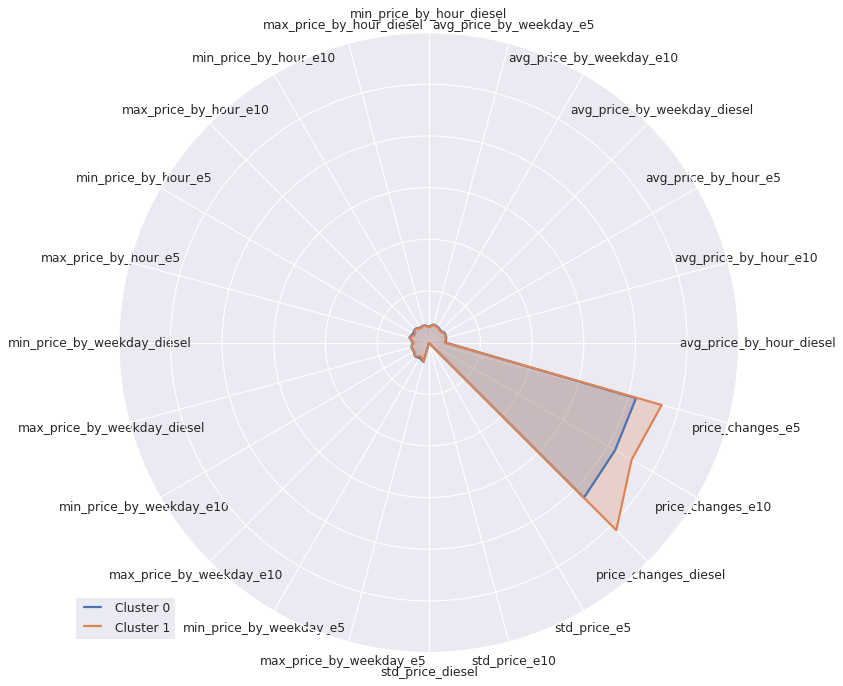

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Funktion zur Erstellung von Radar-Charts für die Clusterzentren
def create_radar_chart(cluster_centers_df, num_clusters):
    labels = cluster_centers_df.columns[:-1]
    num_vars = len(labels)

    # Berechnung der Winkel für jeden Radar-Chart
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Radar-Chart für jeden Cluster
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    for i in range(num_clusters):
        values = cluster_centers_df.iloc[i, :-1].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

# Erstellung der Radar-Charts
create_radar_chart(cluster_centers_df, optimal_k)


Boxplots für Vergleiche innerhalb der Cluster

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


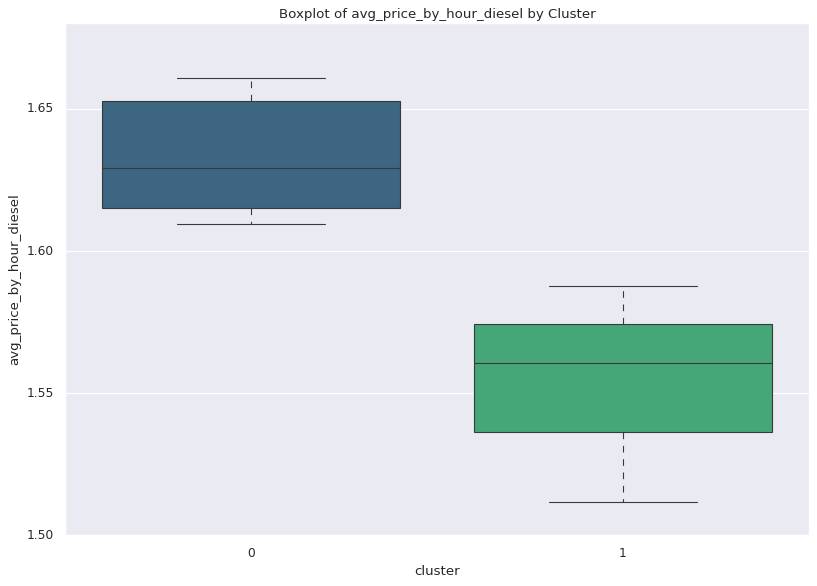

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


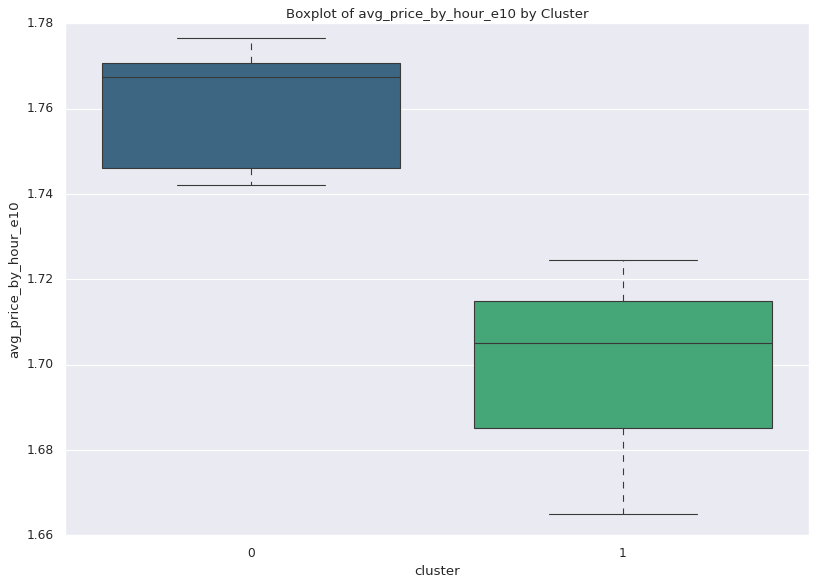

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


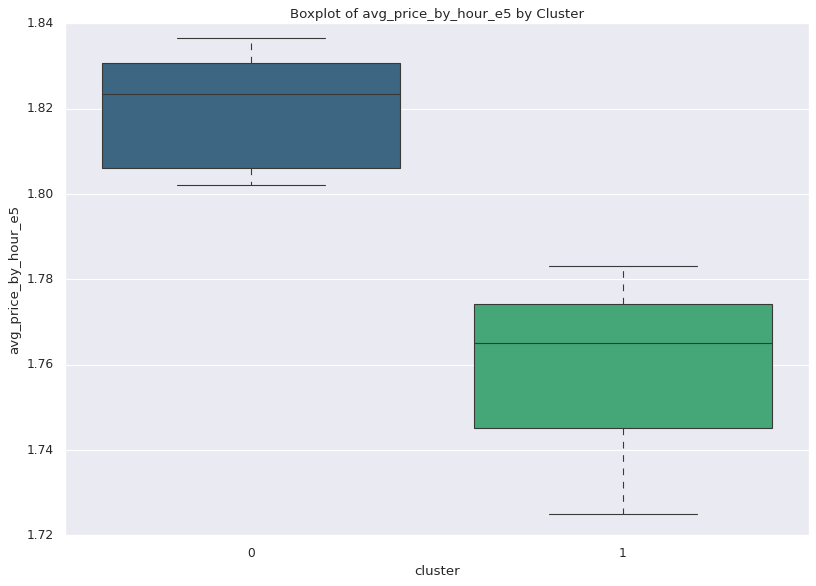

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


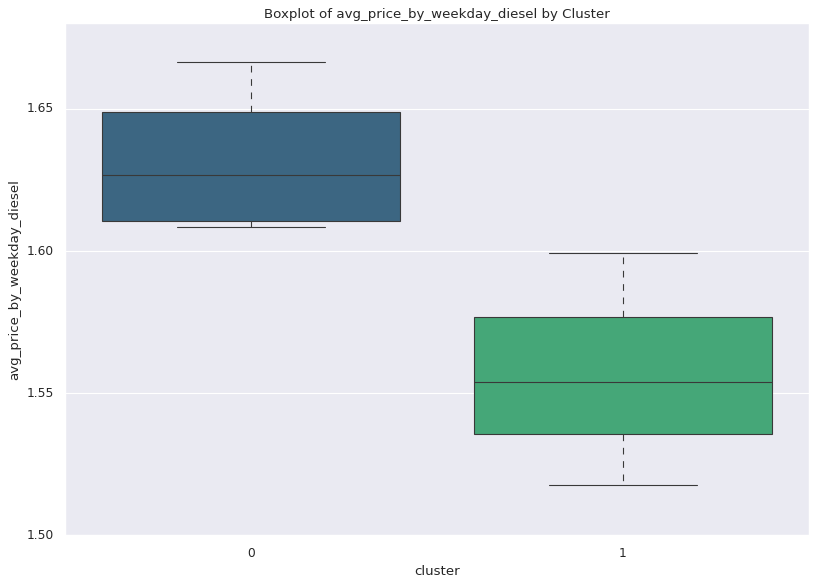

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


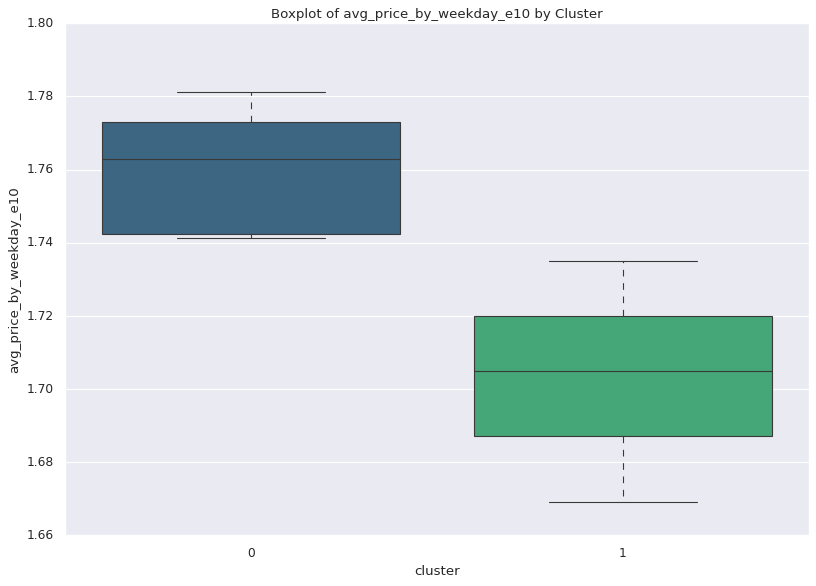

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


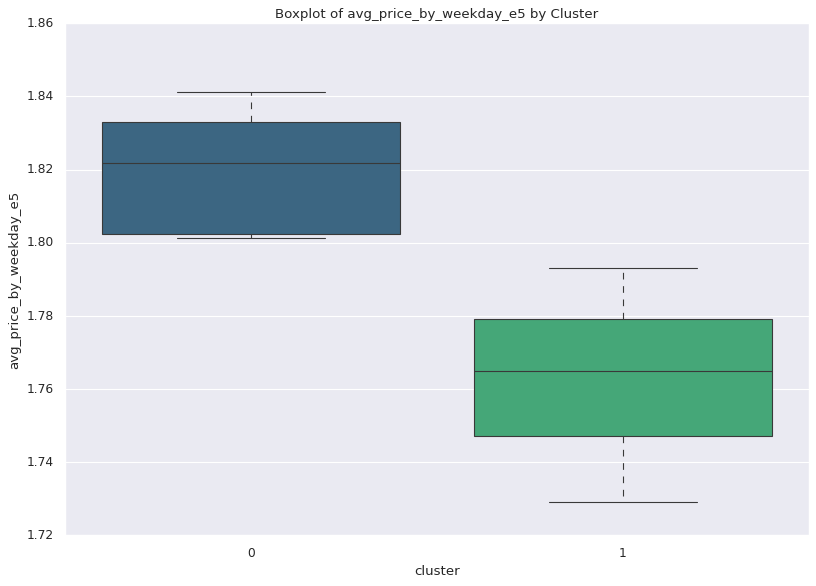

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


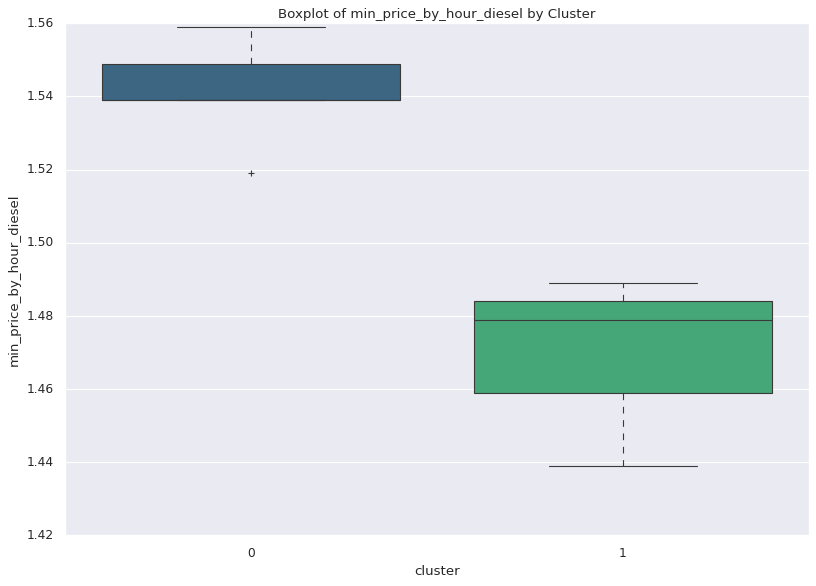

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


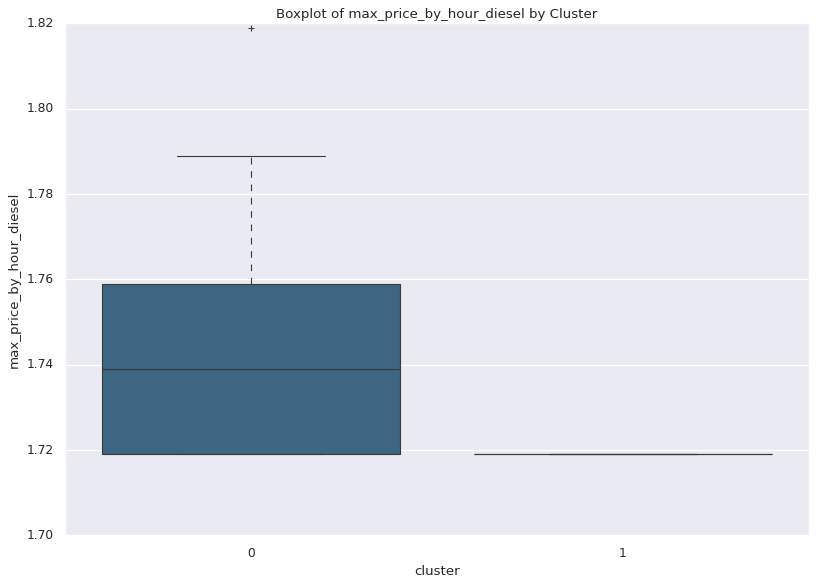

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


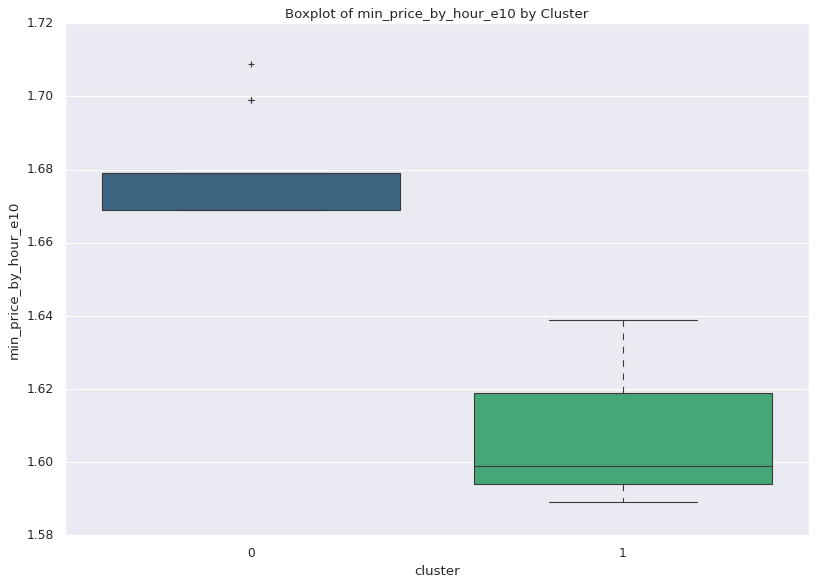

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


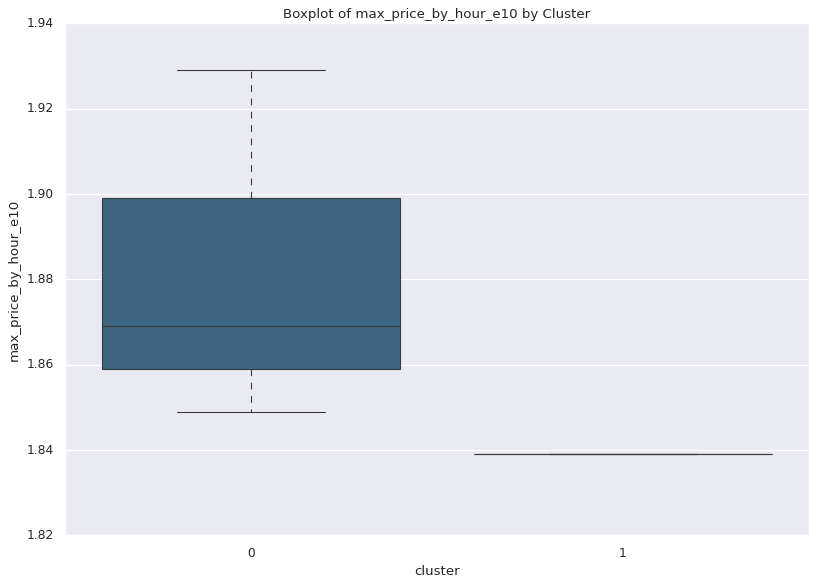

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


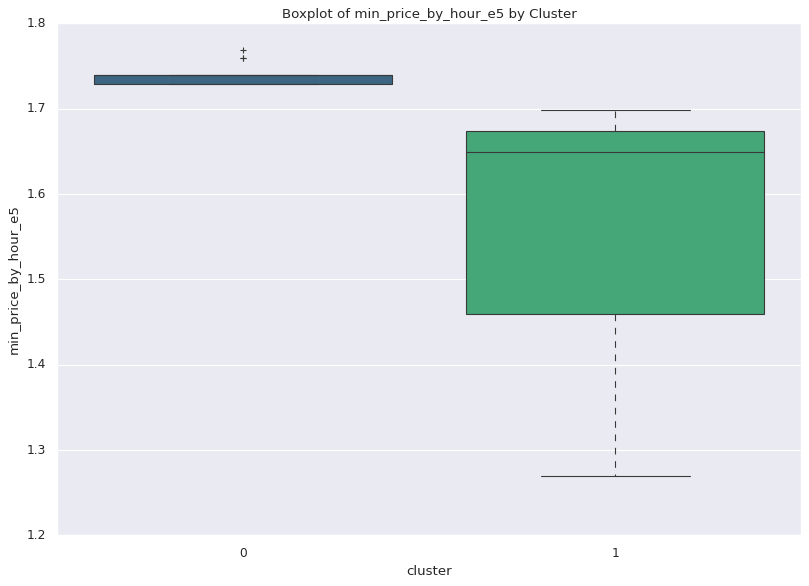

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


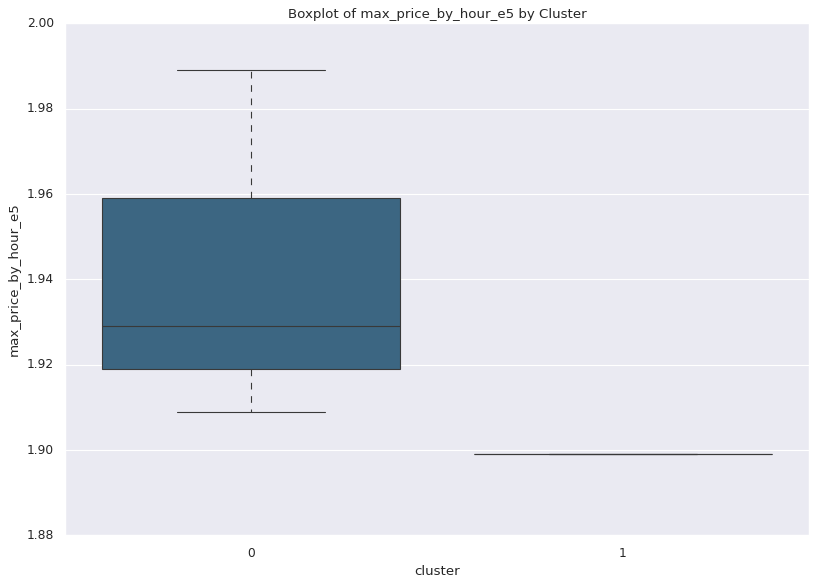

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


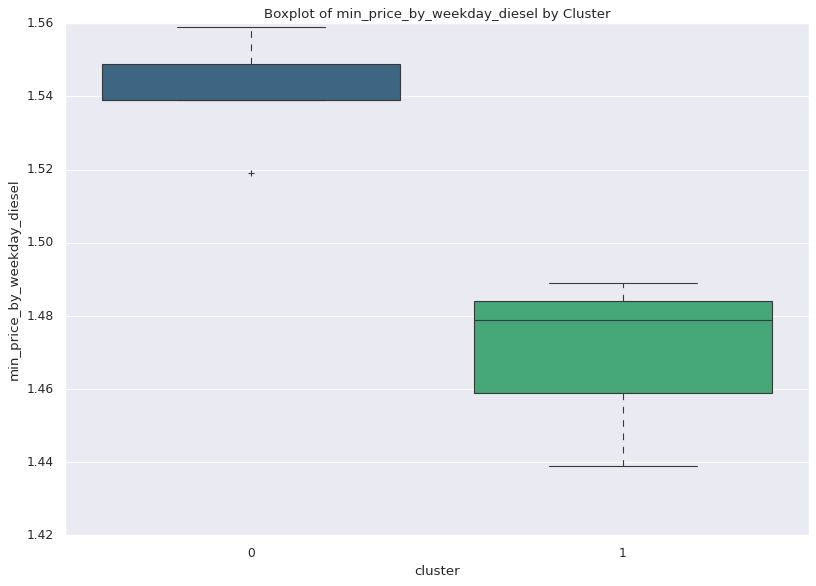

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


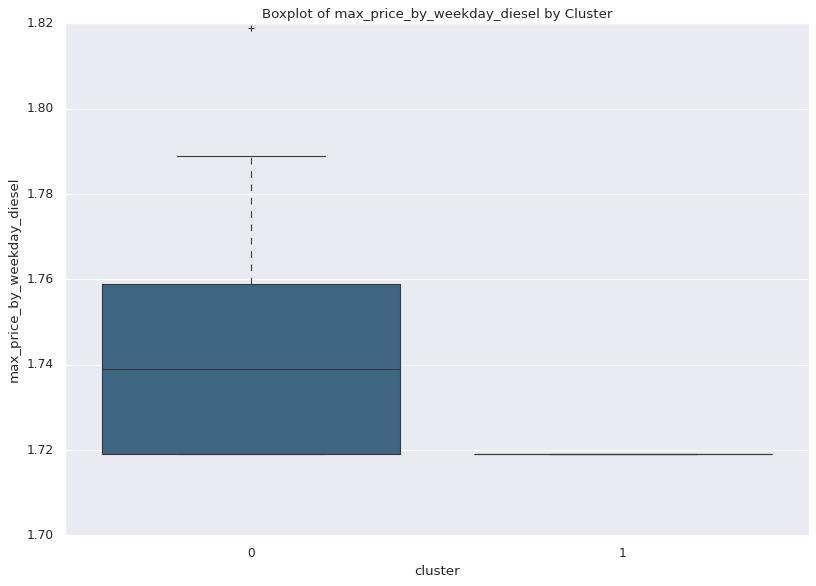

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


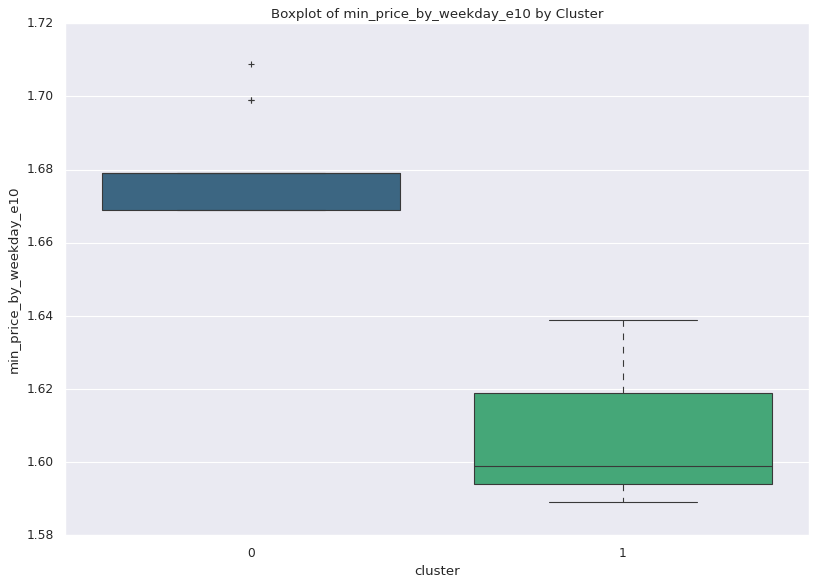

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


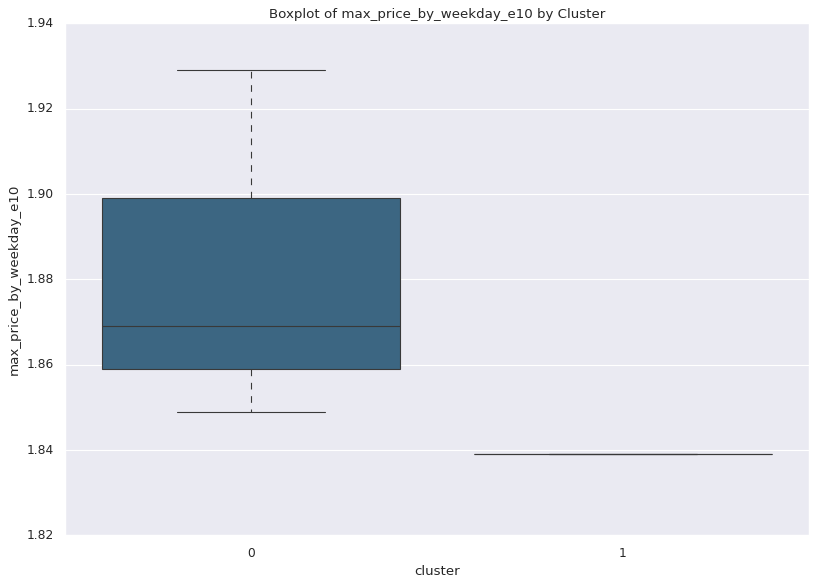

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


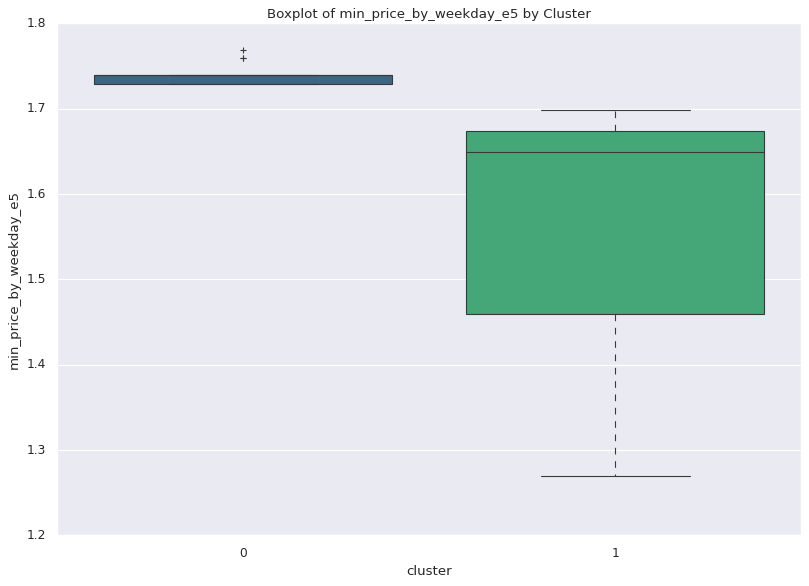

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


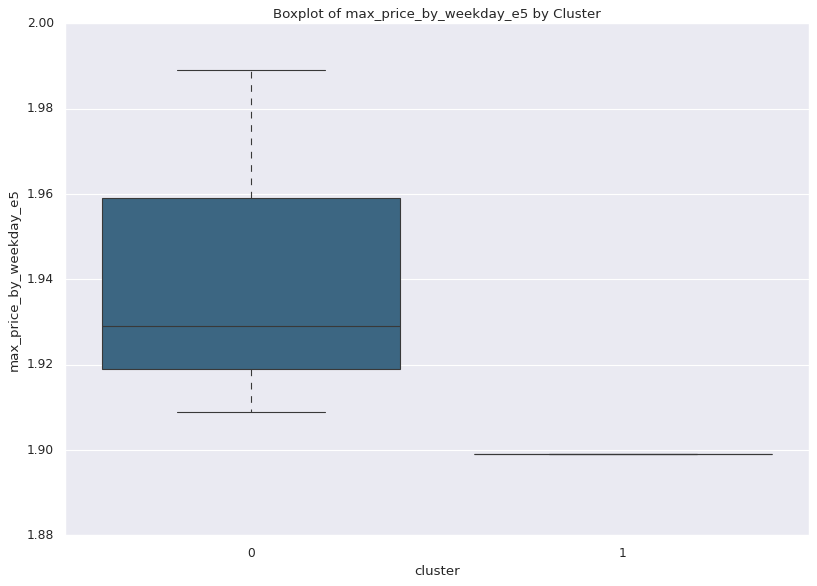

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


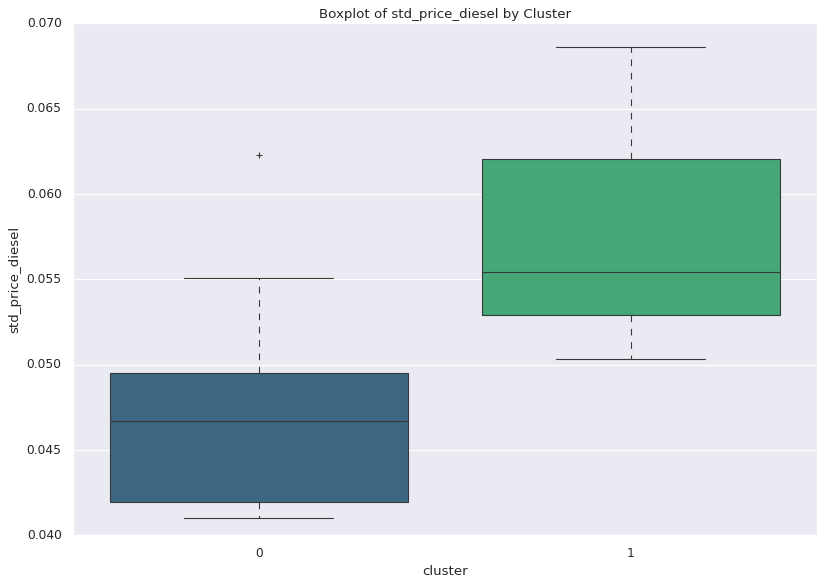

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


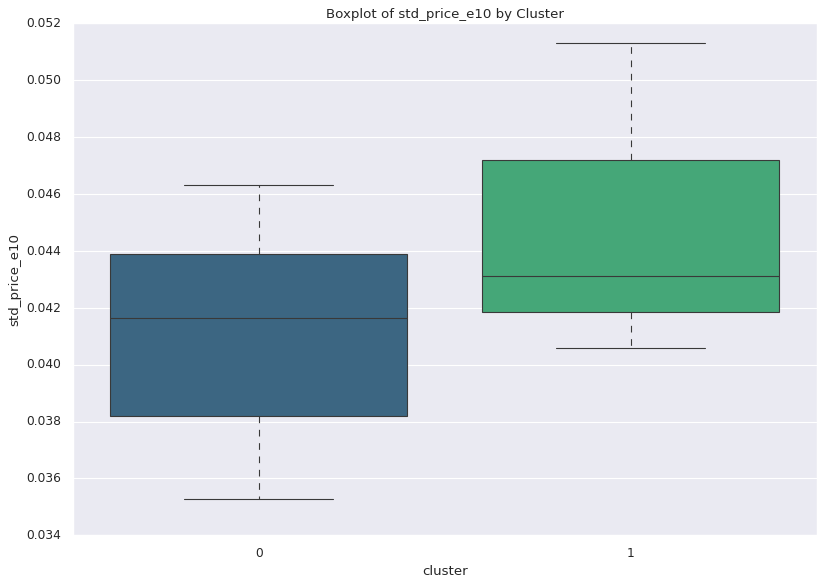

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


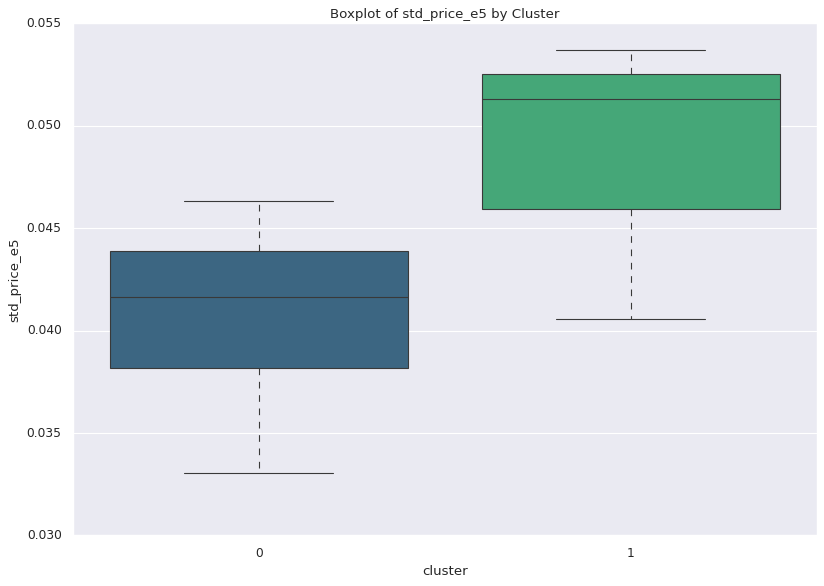

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


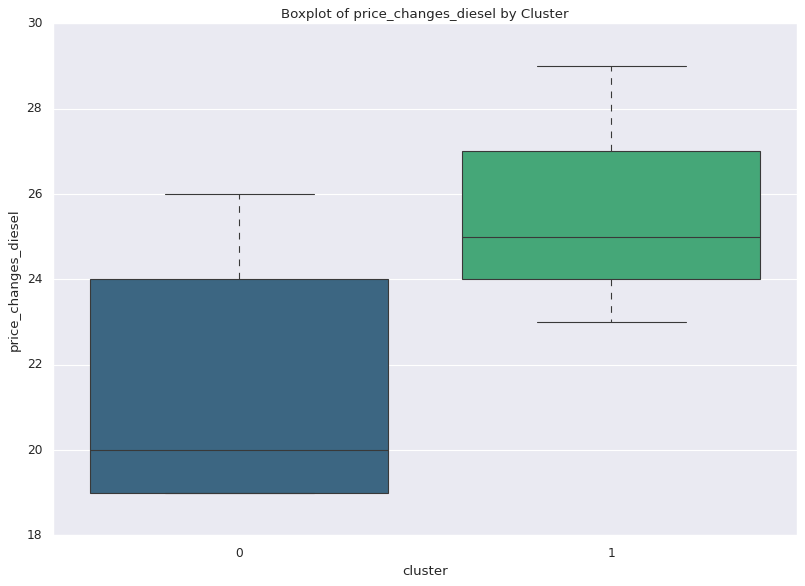

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


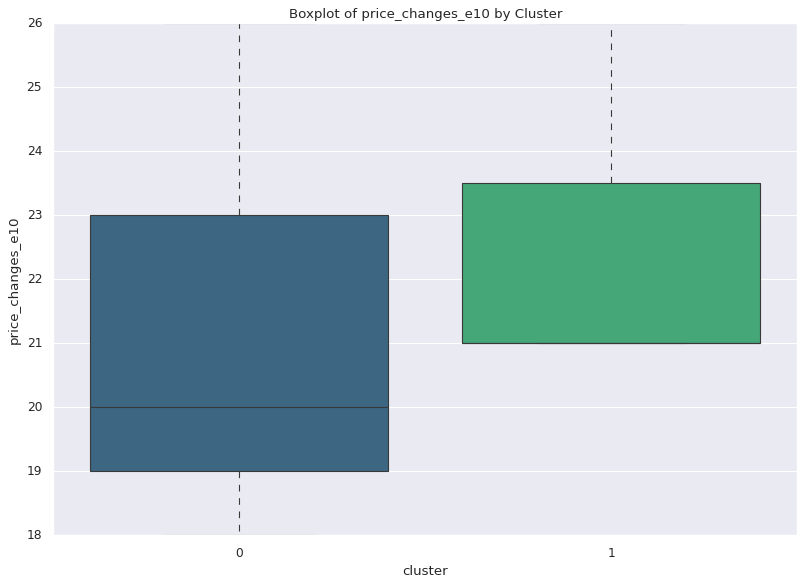

<ipython-input-47-4321050e2bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=column, data=features, palette='viridis')


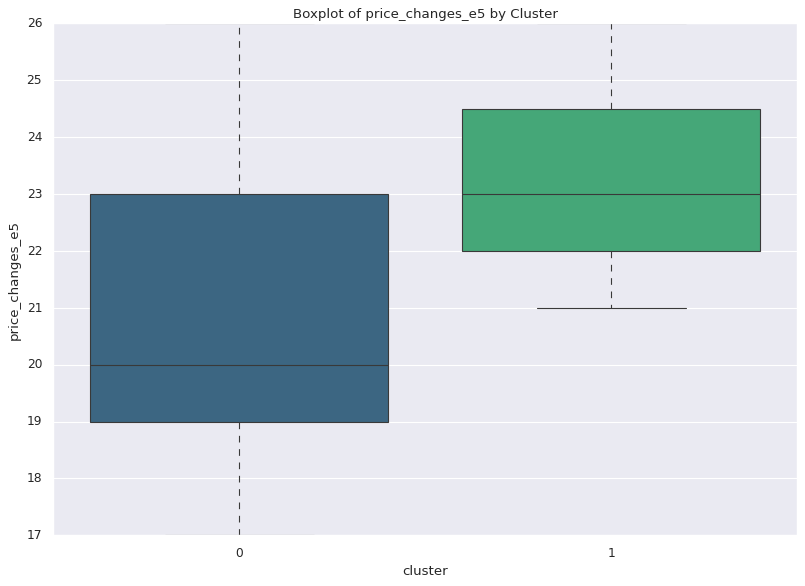

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots für jedes numerische Feature außer 'station_uuid' und 'cluster'
for column in features.columns.drop(['station_uuid', 'cluster']):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='cluster', y=column, data=features, palette='viridis')
    plt.title(f'Boxplot of {column} by Cluster')
    plt.show()


**Hierarchische Clusteranalyse**

Vorbereitung der hierarchischen Clusteranalyse (-> Nach einem Fehler der auftrat, der besagt dass die uuid nicht numerisch ist und daher nicht aufgenommen werden kann) Definition eines eigenen Feature-Sets

In [66]:
# Zusammenführung der Daten ohne 'station_uuid'
features_hcluster = pd.DataFrame({
    'avg_price_by_hour_diesel': avg_price_by_hour_diesel.mean(axis=1),
    'avg_price_by_hour_e10': avg_price_by_hour_e10.mean(axis=1),
    'avg_price_by_hour_e5': avg_price_by_hour_e5.mean(axis=1),
    'avg_price_by_weekday_diesel': avg_price_by_weekday_diesel.mean(axis=1),
    'avg_price_by_weekday_e10': avg_price_by_weekday_e10.mean(axis=1),
    'avg_price_by_weekday_e5': avg_price_by_weekday_e5.mean(axis=1),
    'min_price_by_hour_diesel': min_price_by_hour_diesel.min(axis=1),
    'max_price_by_hour_diesel': max_price_by_hour_diesel.max(axis=1),
    'min_price_by_hour_e10': min_price_by_hour_e10.min(axis=1),
    'max_price_by_hour_e10': max_price_by_hour_e10.max(axis=1),
    'min_price_by_hour_e5': min_price_by_hour_e5.min(axis=1),
    'max_price_by_hour_e5': max_price_by_hour_e5.max(axis=1),
    'min_price_by_weekday_diesel': min_price_by_weekday_diesel.min(axis=1),
    'max_price_by_weekday_diesel': max_price_by_weekday_diesel.max(axis=1),
    'min_price_by_weekday_e10': min_price_by_weekday_e10.min(axis=1),
    'max_price_by_weekday_e10': max_price_by_weekday_e10.max(axis=1),
    'min_price_by_weekday_e5': min_price_by_weekday_e5.min(axis=1),
    'max_price_by_weekday_e5': max_price_by_weekday_e5.max(axis=1),
    'std_price_diesel': std_price_diesel.values,
    'std_price_e10': std_price_e10.values,
    'std_price_e5': std_price_e5.values,
    'price_changes_diesel': price_changes_diesel.values,
    'price_changes_e10': price_changes_e10.values,
    'price_changes_e5': price_changes_e5.values
})

# Ausgabe des Features DataFrame
print(features_hcluster.head())

                                      avg_price_by_hour_diesel  \
station_uuid                                                     
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1                  1.609546   
0dc6786a-38e4-4576-8848-335975dea87b                  1.647199   
22375adc-ed7e-423b-8191-2cd266f6bcd6                  1.611751   
35d5f441-d930-4993-adf4-ee1abdf14000                  1.627724   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af                  1.511841   

                                      avg_price_by_hour_e10  \
station_uuid                                                  
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1               1.742117   
0dc6786a-38e4-4576-8848-335975dea87b               1.773246   
22375adc-ed7e-423b-8191-2cd266f6bcd6               1.742453   
35d5f441-d930-4993-adf4-ee1abdf14000               1.768172   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af               1.664970   

                                      avg_price_by_hour_e5  \
station_uuid                     

**Erstellung eines Dendrogramms zur Bestimmung der Clusterzahl**

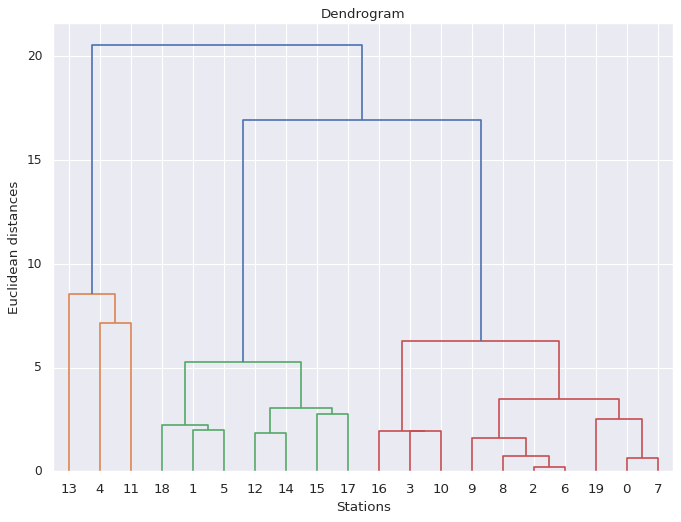

In [68]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Auswahl der numerischen Features für die Skalierung (ohne 'station_uuid')
numeric_features = features_hcluster

# Skalierung der numerischen Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Erstellung des Dendrogramms
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Stations')
plt.ylabel('Euclidean distances')
plt.show()


Durchführung der hierarchischen Clusteranalyse

In [69]:

# Basierend auf dem Dendrogramm wählen wir die Anzahl der Cluster (hier als Beispiel 3)
optimal_clusters = 3  # Dies sollte basierend auf dem Dendrogramm gewählt werden

# Durchführung der Agglomerativen Clusteranalyse
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
features['cluster_hc'] = hc.fit_predict(scaled_features)

# Ausgabe der Clusterzentren (Durchschnittswerte der Merkmale innerhalb der Cluster)
cluster_centers_hc = features.drop(columns='cluster_hc').groupby(features['cluster_hc']).mean()

print(cluster_centers_hc)

            avg_price_by_hour_diesel  avg_price_by_hour_e10  \
cluster_hc                                                    
0                           1.553383               1.698243   
1                           1.619356               1.753210   
2                           1.653086               1.771956   

            avg_price_by_hour_e5  avg_price_by_weekday_diesel  \
cluster_hc                                                      
0                       1.757743                     1.556989   
1                       1.811461                     1.616678   
2                       1.831956                     1.652815   

            avg_price_by_weekday_e10  avg_price_by_weekday_e5  \
cluster_hc                                                      
0                           1.703078                 1.762469   
1                           1.751597                 1.809861   
2                           1.770413                 1.830413   

            min_price_by_hour_di

Interpretation

**Cluster 0**

Durchschnittliche Preise:

Diesel: 1.553383 €/Liter

E10: 1.698243 €/Liter

E5: 1.757743 €/Liter

Die Durchschnittspreise in diesem Cluster sind die niedrigsten im Vergleich zu den anderen Clustern.

**Minimale und maximale Preise:**

Diesel: 1.469000 - 1.719000 €/Liter
E10: 1.609000 - 1.839000 €/Liter
E5: 1.539000 - 1.899000 €/Liter
Diese Preise weisen darauf hin, dass die Tankstellen in diesem Cluster tendenziell niedrigere Preisgrenzen haben.

Standardabweichung der Preise:

Diesel: 0.058132

E10: 0.045001

E5: 0.048538

Höhere Standardabweichungen deuten auf größere Preisvolatilität hin.

Anzahl der Preisänderungen:

Diesel: 25.666667

E10: 22.666667

E5: 23.333333

Diese hohe Anzahl an Preisänderungen zeigt eine aggressive Preisstrategie.

Cluster 1

Durchschnittliche Preise:

Diesel: 1.619356 €/Liter

E10: 1.753210 €/Liter

E5: 1.811461 €/Liter

Die Durchschnittspreise in diesem Cluster sind moderat und liegen zwischen Cluster 0 und Cluster 2.

Minimale und maximale Preise:

Diesel: 1.544000 - 1.726000 €/Liter

E10: 1.681000 - 1.861000 €/Liter

E5: 1.741000 - 1.920000 €/Liter

Diese Preise weisen darauf hin, dass die Tankstellen in diesem Cluster mittlere Preisgrenzen haben.

Standardabweichung der Preise:

Diesel: 0.043524

E10: 0.039284

E5: 0.039059

Niedrigere Standardabweichungen deuten auf stabilere Preise hin.

Anzahl der Preisänderungen:

Diesel: 19.200000

E10: 19.000000

E5: 18.900000

Diese moderate Anzahl an Preisänderungen zeigt eine stabilere Preisstrategie.

Cluster 2

Durchschnittliche Preise:

Diesel: 1.653086 €/Liter

E10: 1.771956 €/Liter

E5: 1.831956 €/Liter

Die Durchschnittspreise in diesem Cluster sind die höchsten im Vergleich zu den anderen Clustern.

Minimale und maximale Preise:

Diesel: 1.541857 - 1.777571 €/Liter

E10: 1.679000 - 1.907571 €/Liter

E5: 1.739000 - 1.967571 €/Liter

Diese Preise weisen darauf hin, dass die Tankstellen in diesem Cluster tendenziell höhere Preisgrenzen haben.

Standardabweichung der Preise:

Diesel: 0.052510

E10: 0.043926

E5: 0.043926

Diese Werte zeigen moderate Preisvolatilität.

Anzahl der Preisänderungen:

Diesel: 24.142857

E10: 23.428571

E5: 23.428571

Diese hohe Anzahl an Preisänderungen zeigt eine relativ dynamische Preisstrategie.

Zusammenfassung und Empfehlungen

Cluster 0

Strategieempfehlung:
Wenn Ihre Tankstelle in Cluster 0 ist, sollten Sie eine aggressive Preisstrategie verfolgen, um wettbewerbsfähig zu bleiben. Dies beinhaltet häufige Preisänderungen und das Halten der Preise am unteren Ende des Spektrums.

Cluster 1
Strategieempfehlung:
Wenn Ihre Tankstelle in Cluster 1 ist, sollten Sie eine stabilere Preisstrategie verfolgen. Halten Sie die Preise moderat und vermeiden Sie zu viele Preisänderungen. Dies kann Stammkunden anziehen, die Stabilität schätzen.

Cluster 2
Strategieempfehlung:
Wenn Ihre Tankstelle in Cluster 2 ist, sollten Sie höhere Preise halten und sich auf Servicequalität und zusätzliche Dienstleistungen konzentrieren, um Kunden zu binden. Die moderate Anzahl an Preisänderungen kann genutzt werden, um auf Marktveränderungen zu reagieren.